# BRAZILIAN E-COMMERCE DATA

# CREDITS:
This work is inspired by multiple greate sources done before:
- https://www.kaggle.com/htrap94/eda-mql-and-closed-deals-dataset
- https://www.kaggle.com/jungjoonlee/eda-with-ecommerce-marketplace-seller-side
- https://www.kaggle.com/jsaguiar/e-commerce-exploratory-analysis
- https://www.kaggle.com/andresionek/joining-marketing-funnel-with-brazilian-e-commerce
- https://www.kaggle.com/andresionek/geospatial-analysis-of-brazilian-e-commerce
- https://www.kaggle.com/gsdeepakkumar/e-commerce-dataset-analysis
- https://www.kaggle.com/hoonkeng/eda-understand-brazil-e-commerce-geographically

# INTRODUCTION
The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight value to customer location, product attributes and finally reviews written by customers.

This is real commercial data provided by Olist, it has been anonymised.Olist connects small businesses from all over Brazil to channels where merchants are able to sell their products and ship them directly to the customers using Olist logistics partners. After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

## Customer Data Schema
The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:

In [2]:
Image(url= "https://i.imgur.com/iLNlNfs.jpg")

## Seller (Merchants) Data Schema
The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:

In [3]:
Image(url= "https://i.imgur.com/BX0QYJh.jpg")

# LIBRARY

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import seaborn as sns
sns.set_style('whitegrid', {'grid.linestyle': '--'})
from IPython.display import Image
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import colorlover as cl

# Others
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
init_notebook_mode(connected=True)

In [5]:
mql = pd.read_csv('../input/marketing-funnel/marketing funnel by olist/olist_marketing_qualified_leads_dataset.csv', 
                  parse_dates=['first_contact_date'])
cd = pd.read_csv('../input/marketing-funnel/marketing funnel by olist/olist_closed_deals_dataset.csv',
                parse_dates=['won_date'])
sellers = pd.read_csv('../input/brazilian-ecommerce/olist_sellers_dataset.csv')
order_items = pd.read_csv('../input/brazilian-ecommerce/olist_order_items_dataset.csv')

products = pd.read_csv("../input/brazilian-ecommerce/olist_products_dataset.csv")
payments = pd.read_csv("../input/brazilian-ecommerce/olist_order_payments_dataset.csv")
orders = pd.read_csv("../input/brazilian-ecommerce/olist_orders_dataset.csv")
reviews = pd.read_csv("../input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
geo = pd.read_csv("../input/brazilian-ecommerce/olist_geolocation_dataset.csv")
customers = pd.read_csv("../input/brazilian-ecommerce/olist_customers_dataset.csv")
product_translation = pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')

In [6]:
#helper function
def pichart_with_table(main_df,column_name,title,top_n,filename):
    fig = plt.figure(figsize=(10,6))

    summary = main_df.groupby(column_name)["mql_id"].nunique().sort_values(ascending=False)
    df = pd.DataFrame({'source':summary.index, 'counts':summary.values})
    labels = df['source']
    counts = df['counts']

    ax1 = fig.add_subplot(121)
    if top_n > 0:
        ax1.pie(counts[0:top_n], labels=labels[0:top_n], autopct='%1.1f%%', startangle=180)
    else:
        ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=180)
    ax1.set_title(title)
    ax1.axis('equal')

    ax2 = fig.add_subplot(122)
    font_size=10
    ax2.axis('off')
    if top_n > 0:
        df_table = ax2.table(cellText=df.values[0:top_n], colLabels=df.columns, loc='center',colWidths=[0.8,0.2])
    else:
        df_table = ax2.table(cellText=df.values, colLabels=df.columns, loc='center',colWidths=[0.8,0.2])

    df_table.auto_set_font_size(False)
    df_table.set_fontsize(font_size)

    fig.tight_layout()
    plt.savefig(filename)
    plt.show()

# 0. MARKETING FUNNEL SUMMARIES 

## 0.1 Marketing Qualified Leads

#### Observation
- 8000 rows
- 8000 unique mql_id
- 336 unique first contact date
- 495 separate landing page
- 10 unique origin marketing channel, denoted by 'origin'

In [7]:
mql.describe()

mql_id   first_contact_date  \
count                               8000                 8000   
unique                              8000                  336   
top     ac936595d26d8c1d3d2db539dce0fffa  2018-05-02 00:00:00   
freq                                   1                   93   
first                                NaN  2017-06-14 00:00:00   
last                                 NaN  2018-05-31 00:00:00   

                         landing_page_id          origin  
count                               8000            7940  
unique                               495              10  
top     b76ef37428e6799c421989521c0e5077  organic_search  
freq                                 912            2296  
first                                NaN             NaN  
last                                 NaN             NaN

## 0.2 Closed Deads

#### Observation
- 842 rows
- 842 unique mql id
- 842 unique seller id
- 32 unique sdr id
- 22 sr id
- 33 separate business segments
- 8 lead types
- 9 different lead behavior profile

In [8]:
cd.describe(include="all")

mql_id                         seller_id  \
count                                842                               842   
unique                               842                               842   
top     119ce5d79e3c006a9e46967bff271cb2  ce77b964b9986a57b37b928be67d9959   
freq                                   1                                 1   
first                                NaN                               NaN   
last                                 NaN                               NaN   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

                                  sdr_id                             sr_id  \
count                                842                               842   
unique                                32                                22   
top     4b339f9567d060bcea4f5136b9f5949e  4ef15afb4b2723d8f3d81e51ec7afefe   
freq                                 140                               133   
first                                NaN                               NaN   
last                                 NaN                               NaN   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

                   won_date business_segment      lead_type  \
count                   842              841            836   
unique                  821               33              8   
top     2018-05-04 03:00:00       home_decor  online_medium   
freq                      6              105            332   
first   2017-12-05 02:00:00              NaN            NaN   
last    2018-11-14 18:04:00              NaN            NaN   
mean                    NaN              NaN            NaN   
std                     NaN              NaN            NaN   
min                     NaN              NaN            NaN   
25%                     NaN              NaN            NaN   
50%                     NaN              NaN            NaN   
75%                     NaN              NaN            NaN   
max                     NaN              NaN            NaN   

       lead_behaviour_profile has_company has_gtin average_stock  \
count                     665          63       64            66   
unique                      9           2        2             6   
top                       cat        True     True        20-May   
freq                      407          58       54            22   
first                     NaN         NaN      NaN           NaN   
last                      NaN         NaN      NaN           NaN   
mean                      NaN         NaN      NaN           NaN   
std                       NaN         NaN      NaN           NaN   
min                       NaN         NaN      NaN           NaN   
25%                       NaN         NaN      NaN           NaN   
50%                       NaN         NaN      NaN           NaN   
75%                       NaN         NaN      NaN           NaN   
max                       NaN         NaN      NaN           NaN   

       busin

## 0.3 Checking for Missing Values

#### Observation
- 60 missing value appears in 'Origin' feature
- has_company, has_gtin, average_stock, declared_product_catalog_size contains lots of missing values, thus we safely remove them from the analysis.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

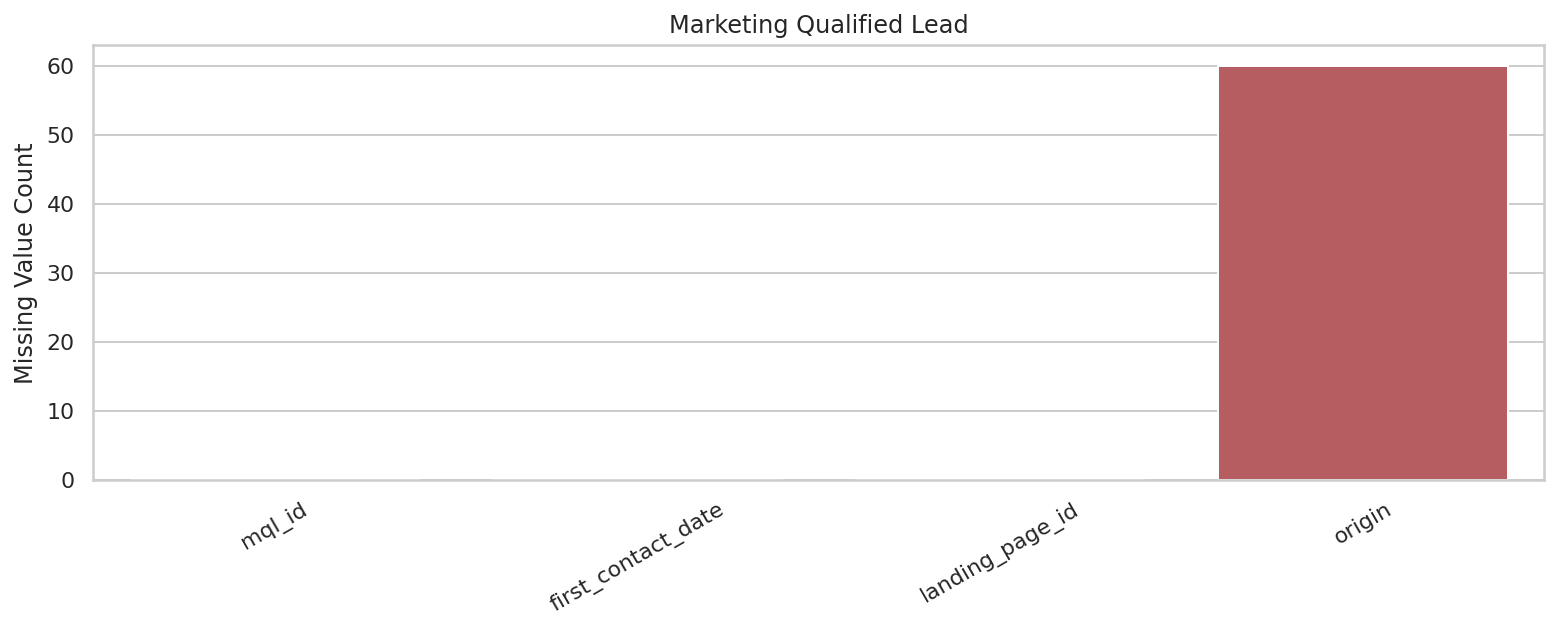

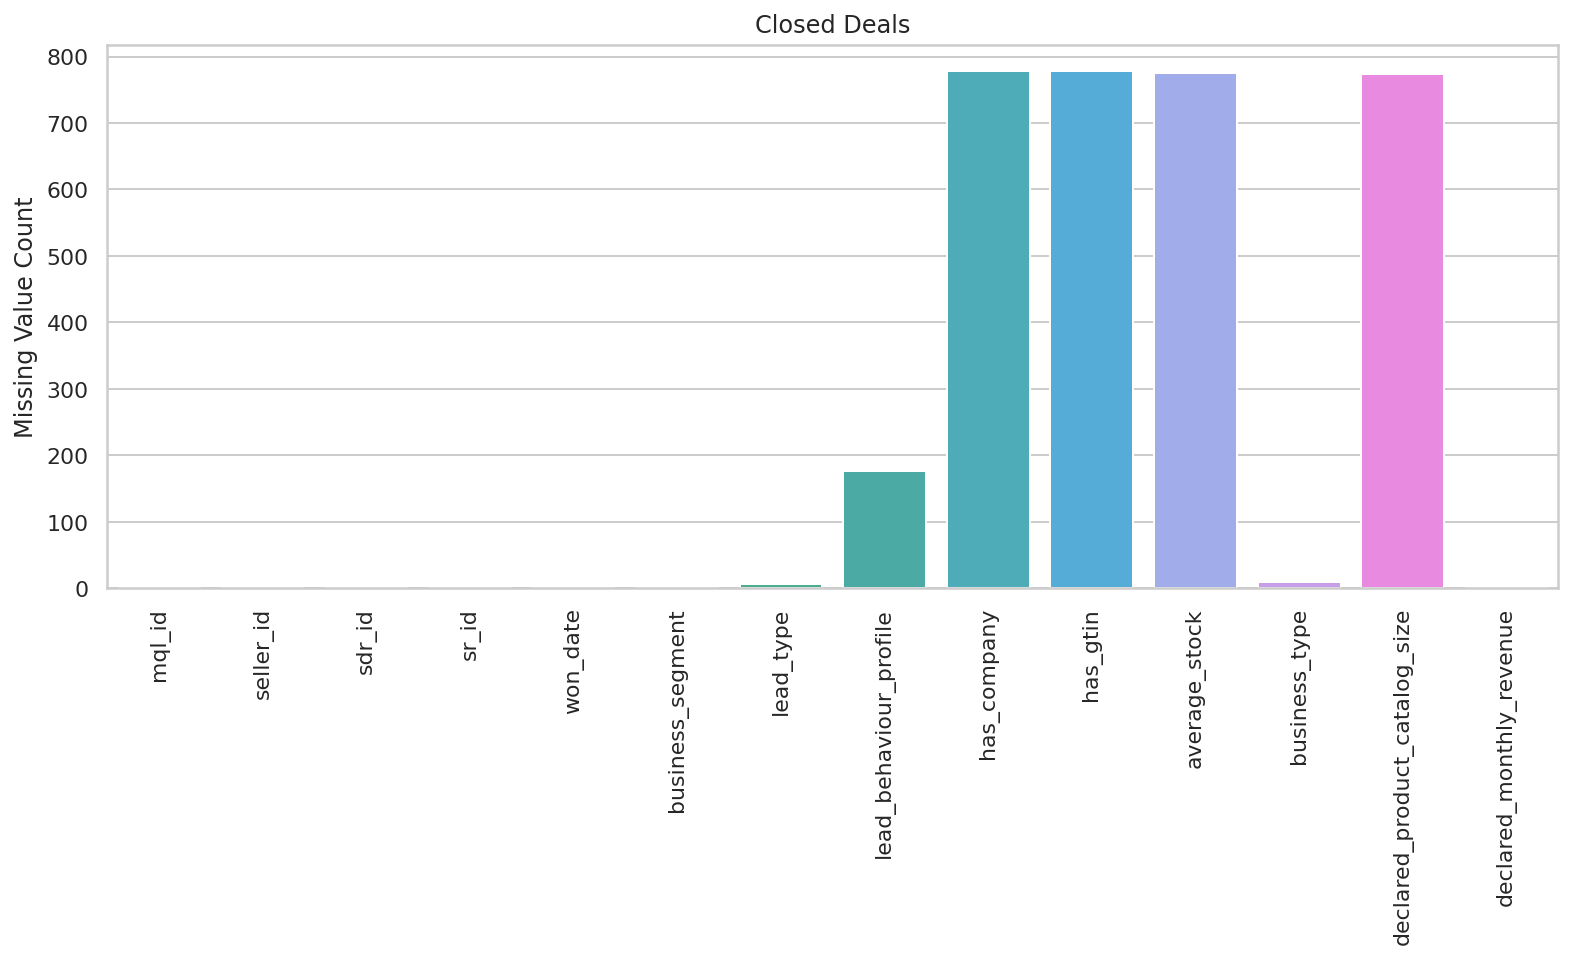

In [9]:
zero_count = (mql.isnull()).sum() # (df1 == 0).sum()
zero_count_df = pd.DataFrame(zero_count)
#zero_count_df.drop('Survived', axis=0, inplace=True)
zero_count_df.columns = ['Missing Value Count']

# https://stackoverflow.com/questions/31859285/rotate-tick-labels-for-seaborn-barplot/60530167#60530167
sns.set(style='whitegrid')
plt.figure(figsize=(13,4))
sns.barplot(x=zero_count_df.index, y=zero_count_df['Missing Value Count'])
plt.title('Marketing Qualified Lead')
plt.xticks(rotation=30)


zero_count = (cd.isnull()).sum() # (df1 == 0).sum()
zero_count_df = pd.DataFrame(zero_count)
#zero_count_df.drop('Survived', axis=0, inplace=True)
zero_count_df.columns = ['Missing Value Count']

sns.set(style='whitegrid')
plt.figure(figsize=(13,5))
sns.barplot(x=zero_count_df.index, y=zero_count_df['Missing Value Count'])
plt.title('Closed Deals')
plt.xticks(rotation=90)

## 0.4 Cleaning

### 0.4.1 Closed deals, Marketing qualified leads

In [10]:
# Remove unnecessary columns
cd = cd.drop(['has_company','has_gtin','average_stock','declared_product_catalog_size'], axis = 1) 

#filling the rest NAs
rest_cols = ['lead_behaviour_profile','business_segment','lead_type','business_type']
cd[rest_cols] = cd[rest_cols].fillna('unknown')
mql['origin'].fillna('unknown')

#checking if any null is remaining or not
cd[cd.isnull().any(axis=1)]

Empty DataFrame
Columns: [mql_id, seller_id, sdr_id, sr_id, won_date, business_segment, lead_type, lead_behaviour_profile, business_type, declared_monthly_revenue]
Index: []

### 0.4.2 Geography

In [11]:
geo =  geo.drop_duplicates(subset=['geolocation_zip_code_prefix'], keep='first')

# Check duplicated value
geo[geo['geolocation_zip_code_prefix'] == 1037]

#geo['geolocation_zip_code_prefix'].duplicated().sum()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   

  geolocation_city geolocation_state  
0        sao paulo                SP

### 0.4.3 Join all tables

In [12]:
data = pd.merge(products,order_items,
                how='inner', on='product_id')
data = pd.merge(data, orders,
                how='inner', on='order_id')
data = pd.merge(data, payments,
                how='inner', on='order_id')
data = pd.merge(data, reviews,
                how='inner', on='order_id')
data = pd.merge(data, customers,
                how='inner', on='customer_id')
data = pd.merge(data, sellers,
                how='inner', on='seller_id')
data = pd.merge(data, geo, 
                how='inner', 
                left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
data = pd.merge(data, product_translation,
                how='left', on='product_category_name') # There are some data without english names
data.shape

(117998, 45)

# 1. MARKETING CHANNEL EFFECTIVENESS
Olist acquired sellers through diverse marketing channels. Let's find out which channel was the most effective in lead generation.

## 1.1 Time Series Analysis of Marketing Qualified Lead (MQL) Volume

In [13]:
# Add a 'year-month' column
mql['first_contact_date(y-m)'] = mql['first_contact_date'].dt.to_period('M')
mql[['first_contact_date', 'first_contact_date(y-m)']].head(3)

first_contact_date first_contact_date(y-m)
0         2018-02-01                 2018-02
1         2017-10-20                 2017-10
2         2018-03-22                 2018-03

In [14]:
# Create time series table
monthly_mql = mql.groupby(by='first_contact_date(y-m)').mql_id.count()
monthly_mql.to_frame().T

first_contact_date(y-m)  2017-06  2017-07  2017-08  2017-09  2017-10  2017-11  \
mql_id                         4      239      386      312      416      445   

first_contact_date(y-m)  2017-12  2018-01  2018-02  2018-03  2018-04  2018-05  
mql_id                       200     1141     1028     1174     1352     1303

#### Observation:
Since 2018, monthly MQL volume soared to above 1,000. 

"\na['first_contact_date(y-m)'] = a['first_contact_date(y-m)'].astype('str')\n\nplt.figure(figsize = (15, 6))\n\nsns.lineplot(x = a['first_contact_date(y-m)'], y = a['mql_id'])\n"

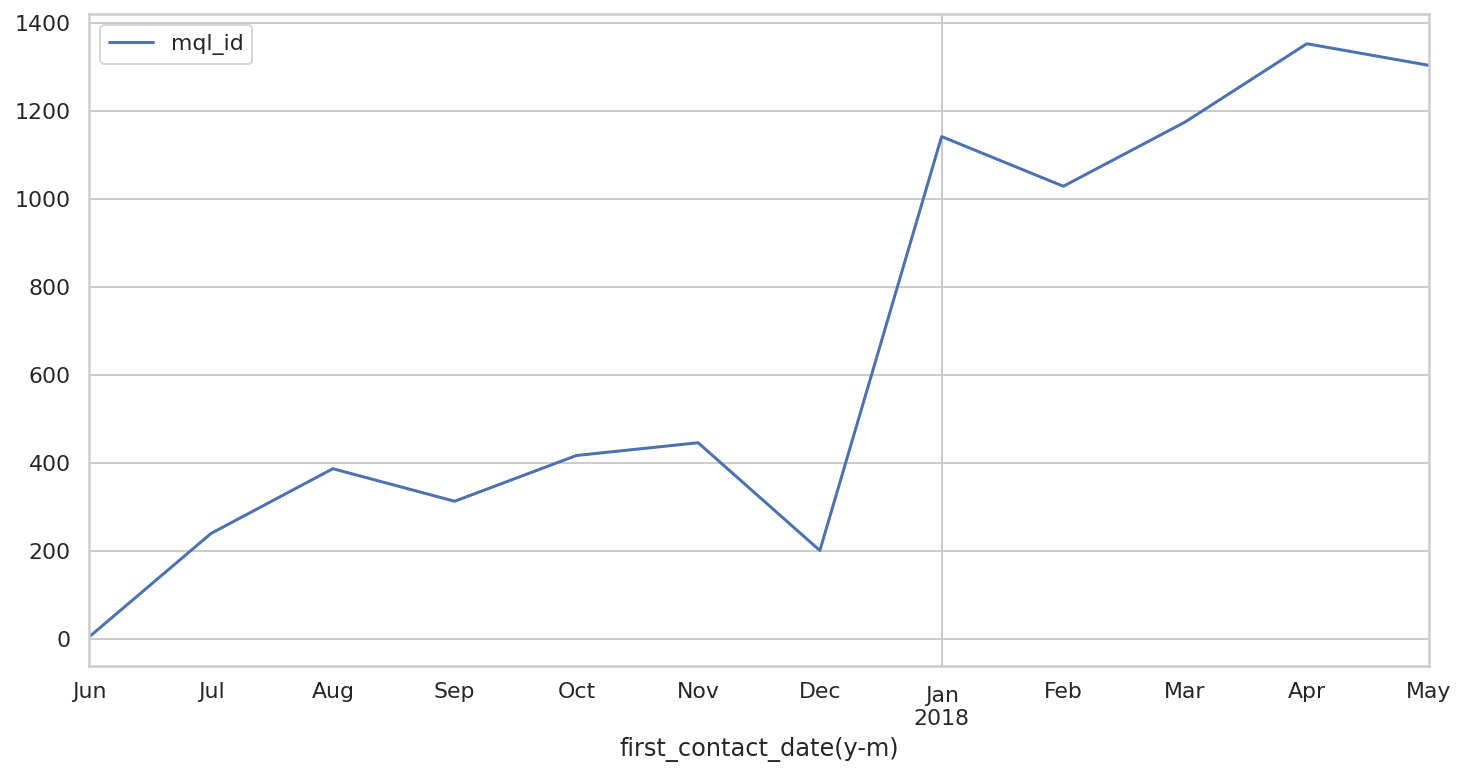

In [15]:
a = monthly_mql.to_frame()

a.plot.line(figsize=(12, 6))

"""
a['first_contact_date(y-m)'] = a['first_contact_date(y-m)'].astype('str')

plt.figure(figsize = (15, 6))

sns.lineplot(x = a['first_contact_date(y-m)'], y = a['mql_id'])
""" 

## 1.2 Marketing Channel
- Marketing channel is recorded in 'origin' field.

### 1.2.1 Marketing Channel Overall

#### Observation
- Organic search, paid search, and social platform are 3 leading marketing channels that drive people to website
- Nearly 5k customers come from online platforms: organic and paid search, direct traffic, email, while the rest are sources like referral, display, other.

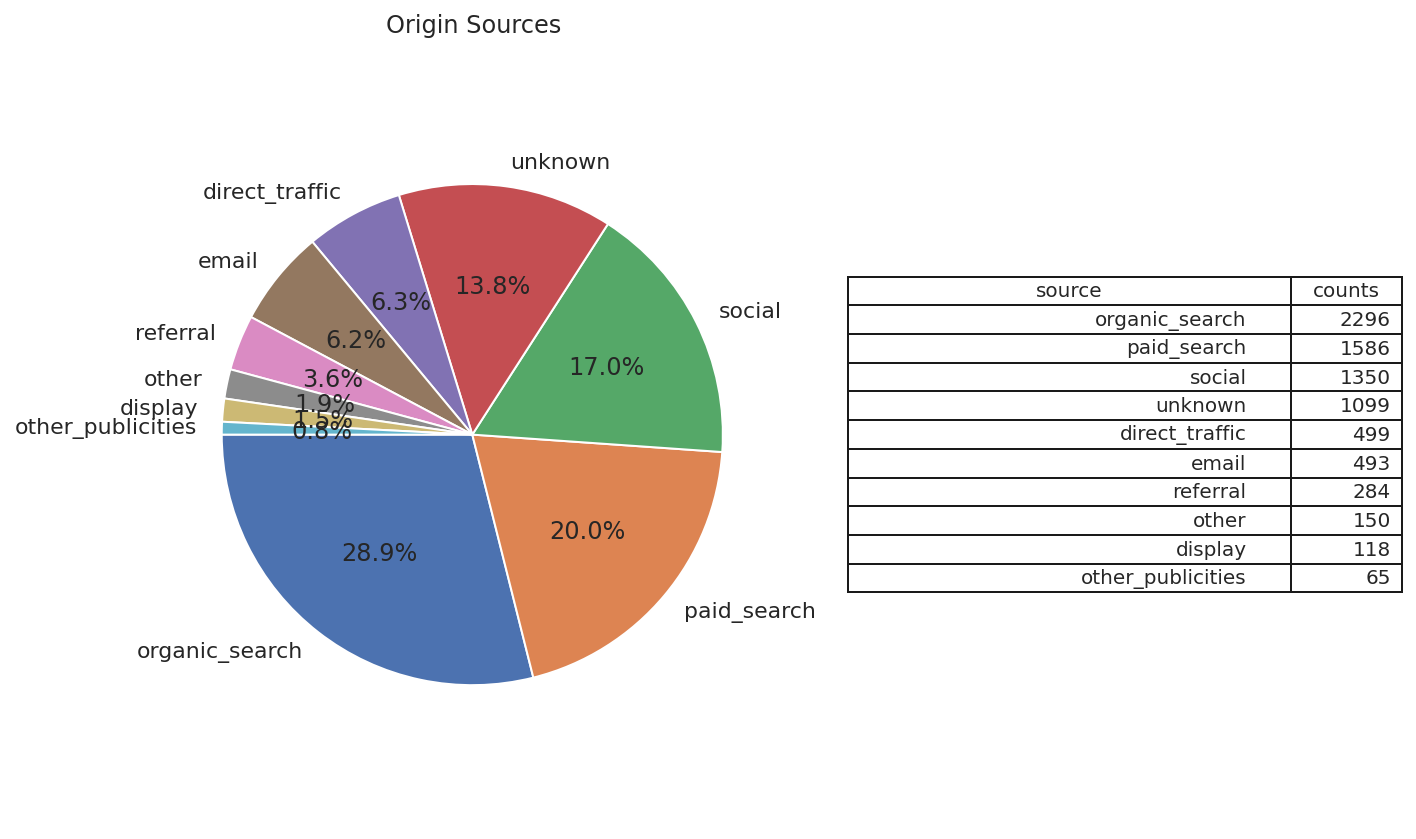

In [16]:
pichart_with_table(mql,"origin","Origin Sources",-1,"origin_mql.png")

### 1.2.2 MQL Volume by Marketing Channel between 06/2017 - 07/2018

In [17]:
mql_origin = pd.pivot_table(mql,
                            index='origin',
                            columns='first_contact_date(y-m)',
                            values='mql_id',                            
                            aggfunc='count',
                            fill_value=0)

In [18]:
mql.groupby('origin')['mql_id'].count().sort_values(ascending=False)

origin
organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: mql_id, dtype: int64

In [19]:
# Sort index from largest to smallest in volume
# == origin_list = mql['origin'].value_counts()
origin_list = mql.groupby('origin')['mql_id'] \
                                   .count().sort_values(ascending=False).index
mql_origin = mql_origin.reindex(origin_list)
mql_origin

first_contact_date(y-m)  2017-06  2017-07  2017-08  2017-09  2017-10  2017-11  \
origin                                                                          
organic_search                 0       54      122       78      125      121   
paid_search                    0       56       79       64      100       70   
social                         0       12       45       56       52       95   
unknown                        1       35       70       39       53       63   
direct_traffic                 0       16       22       22       23       26   
email                          1       19       24       23       30       37   
referral                       0        8       16       12        8       20   
other                          0       12        3        9        8        3   
display                        1       19        2        5        5        6   
other_publicities              0        3        2        4       11        3   

first_contact_date(y-m)  2017-12  2018-01  2018-02  2018-03  2018-04  2018-05  
origin                                                                         
organic_search                60      412      291      340      349      344  
paid_search                   35      170      212      262      272      266  
social                        39      162      156      139      325      269  
unknown                       25      151      156      186      166      154  
direct_traffic                10       82       65       80       75       78  
email                         12       61       68       74       50       94  
referral                       9       41       34       38       45       53  
other                          1       39       16       22       26       11  
display                        5       11       18       16       19       11  
other_publicities              1        7        5        8       12        9

#### Observation:
- Paid search is the second biggest contributor to lead generation after 'organic search'.
- The third one is 'social' which acquired MQLs more than or similar to 'paid search' since April 2018.
- If the marginal cost of paid search increases, it would be possible to examine effectiveness of 'social' as an alternative.

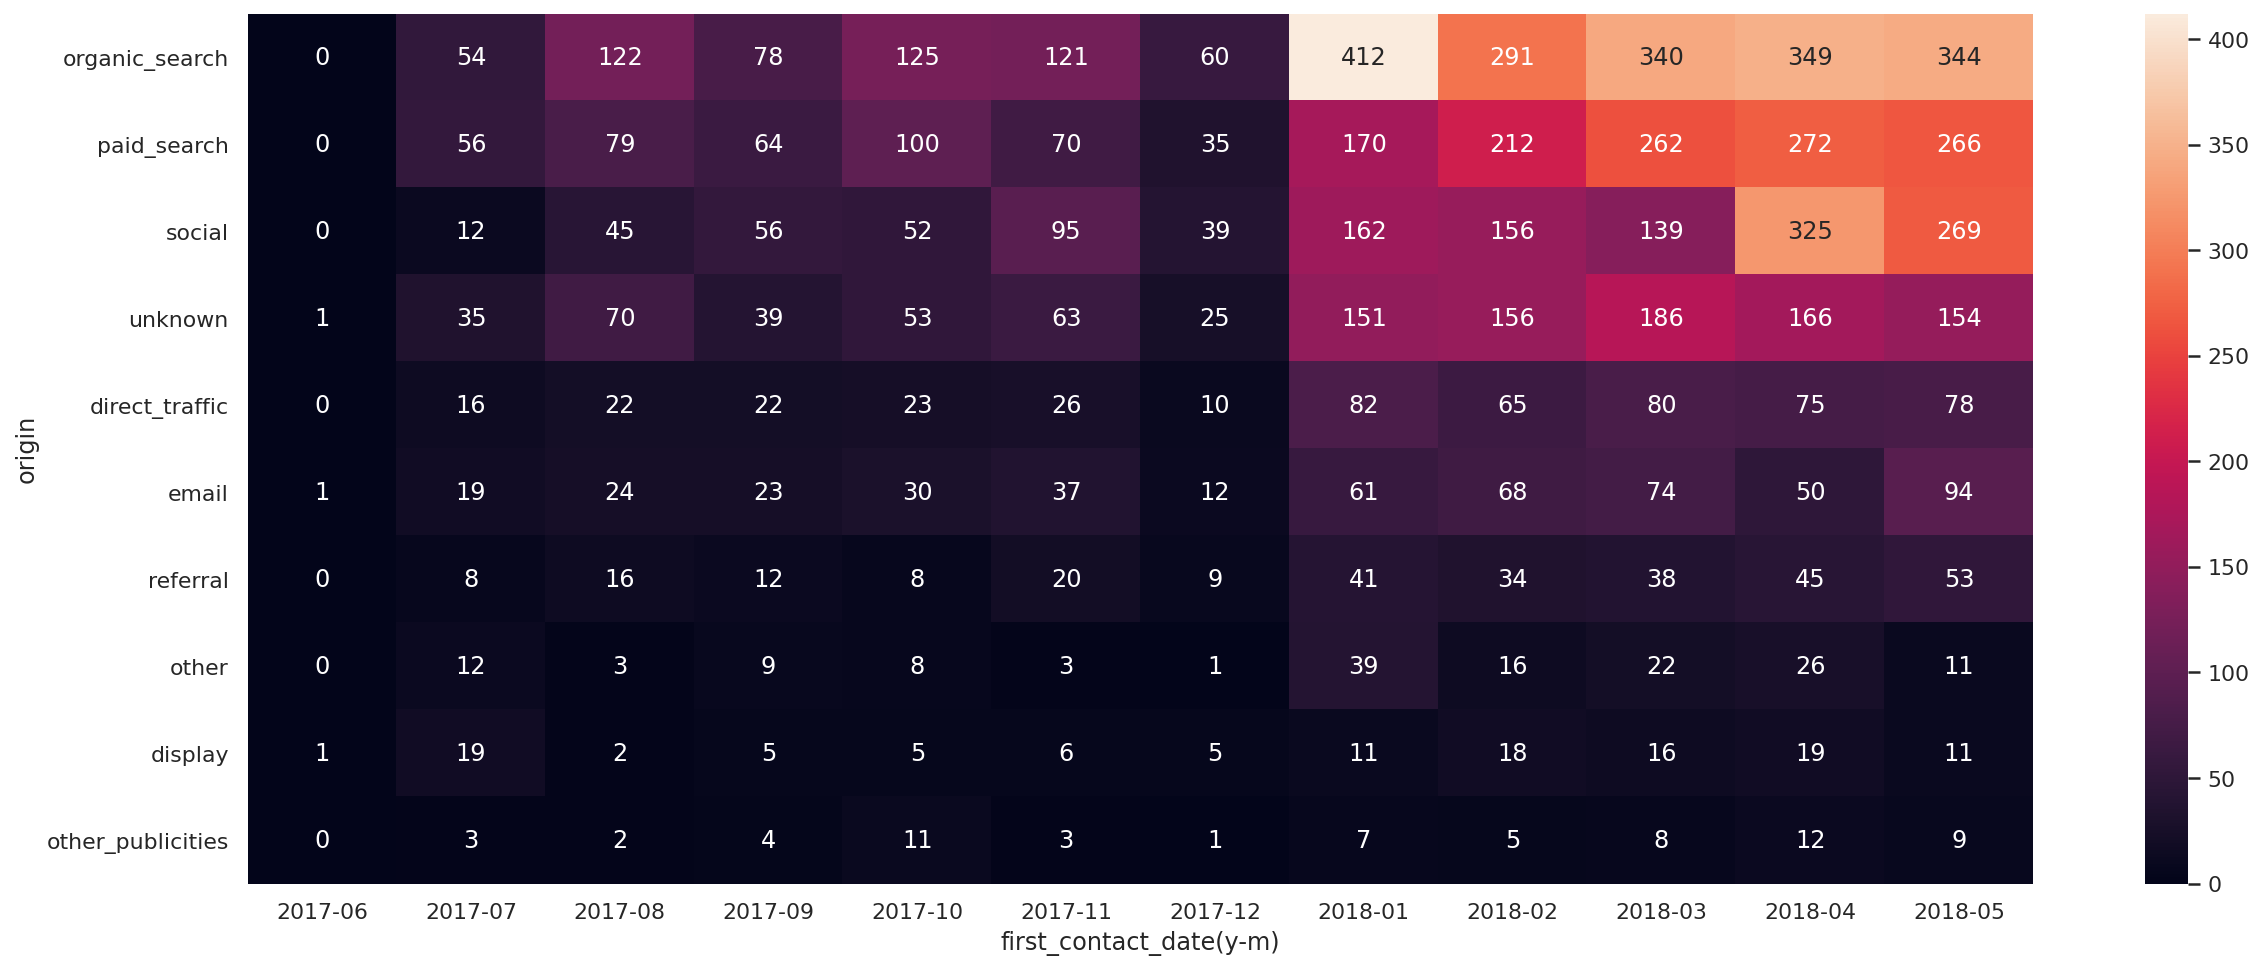

In [20]:
# Plot the monthly volume by channel
plt.figure(figsize=(20,8))
sns.heatmap(mql_origin, annot=True, fmt='g');

## 1.3 Landing Page

#### Observation
- Top 10 landing page

In [21]:
landing_page_origin = mql['landing_page_id'].value_counts()

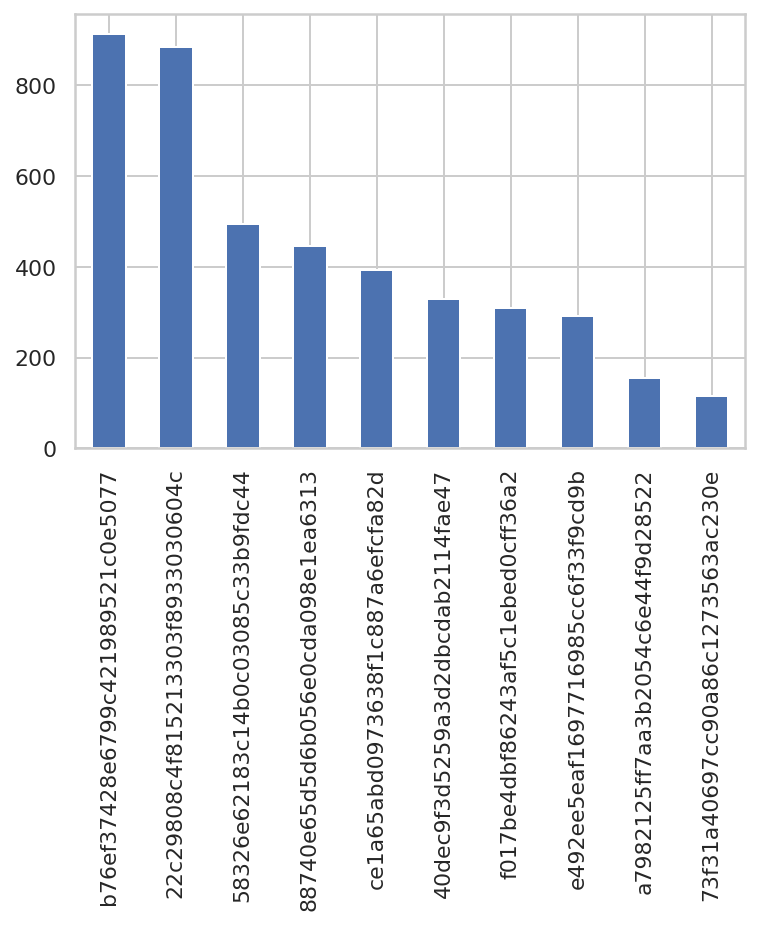

In [22]:
landing_page_origin[:10].plot.bar()

# 2. SALES PERFORMANCE OVERVIEW
After a MQL,who finally signed up for seller is called a closed deal, filled a form on landing page to sign up for seller, a Sales Development Representative(SDR) contacted the MQL and gathered more information about the lead. Then a Sales Representative(SR) consulted the MQL. So interaction between SDRs/SRs and MQLs can affect conversion from MQLs to sellers.

At this section I will deal with three aspects of sales result such as Closed deal volumne, Conversion rate and Sales length.

## 2.1 Time Series Volume of Closed Deals

In [23]:
# Merge 'MQL' with 'closed deals'
# Merge by 'left' in order to evaluate conversion rate
mql_cd = pd.merge(mql,
                  cd,
                  how='left',
                  on='mql_id')

In [24]:
# Add a column to distinguish signed MOLs from MQLs who left without signing up
mql_cd['seller_id(bool)'] = mql_cd['seller_id'].notna()

In [25]:
mql_cd.head()

mql_id first_contact_date  \
0  dac32acd4db4c29c230538b72f8dd87d         2018-02-01   
1  8c18d1de7f67e60dbd64e3c07d7e9d5d         2017-10-20   
2  b4bc852d233dfefc5131f593b538befa         2018-03-22   
3  6be030b81c75970747525b843c1ef4f8         2018-01-22   
4  5420aad7fec3549a85876ba1c529bd84         2018-02-21   

                    landing_page_id          origin first_contact_date(y-m)  \
0  88740e65d5d6b056e0cda098e1ea6313          social                 2018-02   
1  007f9098284a86ee80ddeb25d53e0af8     paid_search                 2017-10   
2  a7982125ff7aa3b2054c6e44f9d28522  organic_search                 2018-03   
3  d45d558f0daeecf3cccdffe3c59684aa           email                 2018-01   
4  b48ec5f3b04e9068441002a19df93c6c  organic_search                 2018-02   

                          seller_id                            sdr_id  \
0                               NaN                               NaN   
1                               NaN                               NaN   
2                               NaN                               NaN   
3                               NaN                               NaN   
4  2c43fb513632d29b3b58df74816f1b06  a8387c01a09e99ce014107505b92388c   

                              sr_id            won_date business_segment  \
0                               NaN                 NaT              NaN   
1                               NaN                 NaT              NaN   
2                               NaN                 NaT              NaN   
3                               NaN                 NaT              NaN   
4  4ef15afb4b2723d8f3d81e51ec7afefe 2018-02-26 19:58:00              pet   

       lead_type lead_behaviour_profile business_type  \
0            NaN                    NaN           NaN   
1            NaN                    NaN           NaN   
2            NaN                    NaN           NaN   
3            NaN                    NaN           NaN   
4  online_medium                    cat      reseller   

   declared_monthly_revenue  seller_id(bool)  
0                       NaN            False  
1                       NaN            False  
2                       NaN            False  
3                       NaN            False  
4                       0.0             True

In [26]:
# alternative: mql_cd.groupby('first_contact_date(y-m)')['seller_id'].count()
# Compute monthly closed deals
monthly_cd = mql_cd.groupby('first_contact_date(y-m)')['seller_id(bool)'].sum()
monthly_cd

first_contact_date(y-m)
2017-06      0.0
2017-07      2.0
2017-08      9.0
2017-09      7.0
2017-10     14.0
2017-11     18.0
2017-12     11.0
2018-01    152.0
2018-02    149.0
2018-03    167.0
2018-04    183.0
2018-05    130.0
Freq: M, Name: seller_id(bool), dtype: float64

#### Observation:
- Likewise, monthly volume of closed deals sharply increased after 2018.

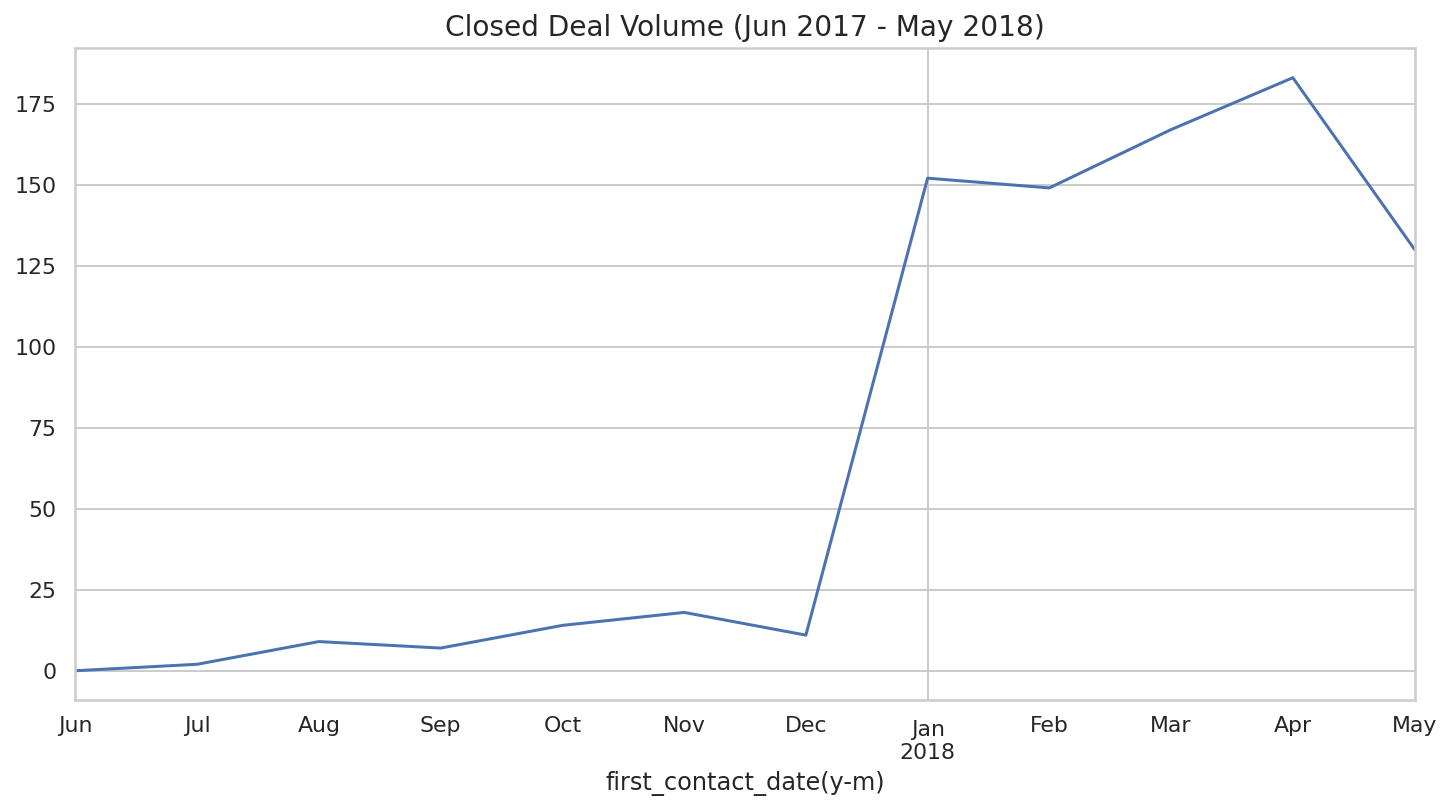

In [27]:
# Plot the monthly volume of closed deals
monthly_cd.plot.line(figsize=(12, 6))
plt.title('Closed Deal Volume (Jun 2017 - May 2018)', fontsize=14);

## 2.2 Conversion Rate
Conversion rate means the percentage of MQLs who finally signed up for sellers (closed deals).

In [28]:
monthly_conversion = mql_cd.groupby(by='first_contact_date(y-m)')['seller_id(bool)'].agg(['count', 'sum'])

monthly_conversion['conversion_rate(%)'] = ((monthly_conversion['sum'] / monthly_conversion['count']) * 100).round(1)
monthly_conversion

count    sum  conversion_rate(%)
first_contact_date(y-m)                                  
2017-06                      4    0.0                 0.0
2017-07                    239    2.0                 0.8
2017-08                    386    9.0                 2.3
2017-09                    312    7.0                 2.2
2017-10                    416   14.0                 3.4
2017-11                    445   18.0                 4.0
2017-12                    200   11.0                 5.5
2018-01                   1141  152.0                13.3
2018-02                   1028  149.0                14.5
2018-03                   1174  167.0                14.2
2018-04                   1352  183.0                13.5
2018-05                   1303  130.0                10.0

Conversion rate also increased with volume.

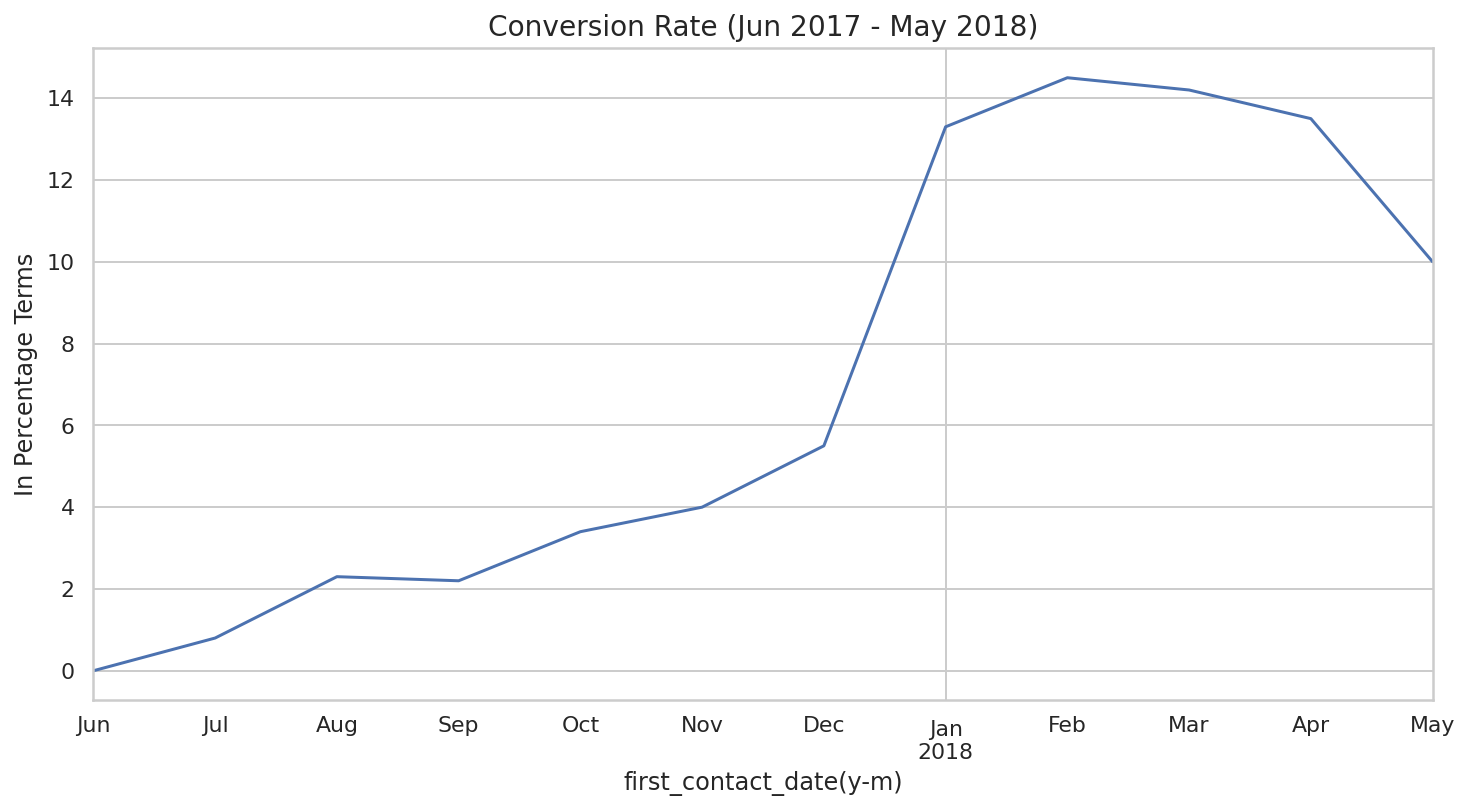

In [29]:
# Plot the monthly conversion rate
monthly_conversion['conversion_rate(%)'].plot.line(figsize=(12, 6))
plt.ylabel('In Percentage Terms')
plt.title('Conversion Rate (Jun 2017 - May 2018)', fontsize=14);

## 2.3 Sales Length
- Sales length means period from first contact to signing up for seller.

In [30]:
mql_cd.head(3)

mql_id first_contact_date  \
0  dac32acd4db4c29c230538b72f8dd87d         2018-02-01   
1  8c18d1de7f67e60dbd64e3c07d7e9d5d         2017-10-20   
2  b4bc852d233dfefc5131f593b538befa         2018-03-22   

                    landing_page_id          origin first_contact_date(y-m)  \
0  88740e65d5d6b056e0cda098e1ea6313          social                 2018-02   
1  007f9098284a86ee80ddeb25d53e0af8     paid_search                 2017-10   
2  a7982125ff7aa3b2054c6e44f9d28522  organic_search                 2018-03   

  seller_id sdr_id sr_id won_date business_segment lead_type  \
0       NaN    NaN   NaN      NaT              NaN       NaN   
1       NaN    NaN   NaN      NaT              NaN       NaN   
2       NaN    NaN   NaN      NaT              NaN       NaN   

  lead_behaviour_profile business_type  declared_monthly_revenue  \
0                    NaN           NaN                       NaN   
1                    NaN           NaN                       NaN   
2                    NaN           NaN                       NaN   

   seller_id(bool)  
0            False  
1            False  
2            False

In [31]:
# .dt.days -> work for  TimedeltaProperties

# Calculate sales length in days
mql_cd['sales_length(day)'] = (mql_cd['won_date'] - mql_cd['first_contact_date']).dt.days
mql_cd[['first_contact_date', 'won_date', 'sales_length(day)']].head()

first_contact_date            won_date  sales_length(day)
0         2018-02-01                 NaT                NaN
1         2017-10-20                 NaT                NaN
2         2018-03-22                 NaT                NaN
3         2018-01-22                 NaT                NaN
4         2018-02-21 2018-02-26 19:58:00                5.0

In [32]:
# won_date always occur after first_contact_date, thus sales_length(day) must be > 0
# remove the outliers
mql_cd = mql_cd[mql_cd['sales_length(day)'] > 0]

#### Observation
- Most conversion length is from 0 to 70 days

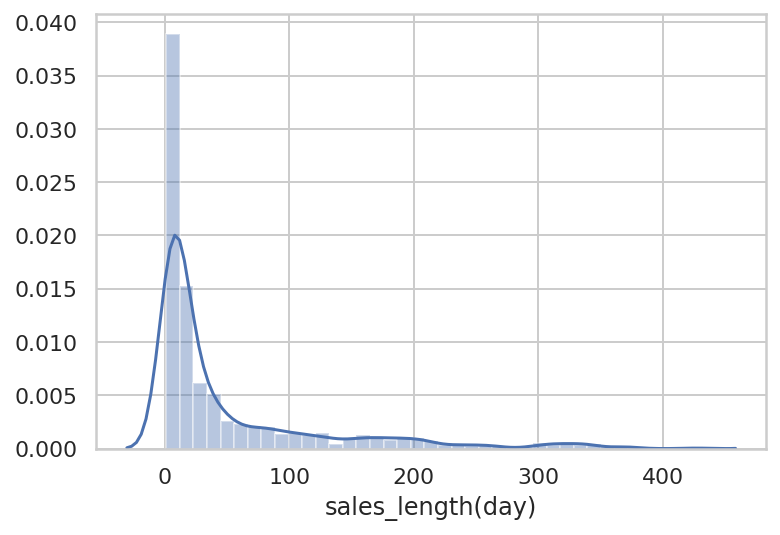

In [33]:
sns.distplot(mql_cd['sales_length(day)'])

In [34]:
# Separate sales length for each year
closed_deal = (mql_cd['seller_id'].notna())
lead_2017 = (mql_cd['first_contact_date'].dt.year.astype('str') == '2017')
lead_2018 = (mql_cd['first_contact_date'].dt.year.astype('str') == '2018')

sales_length_2017 = mql_cd[closed_deal & lead_2017]['sales_length(day)']
sales_length_2018 = mql_cd[closed_deal & lead_2018]['sales_length(day)']

#### Observation
- Sales length was dramatically shortened as well. While 13.1% of deals were closed within 50 days in 2017, 78.9% was closed in 2018. 
- In a nutshell, both conversion rate and sales length were improved in 2018 against 2017.

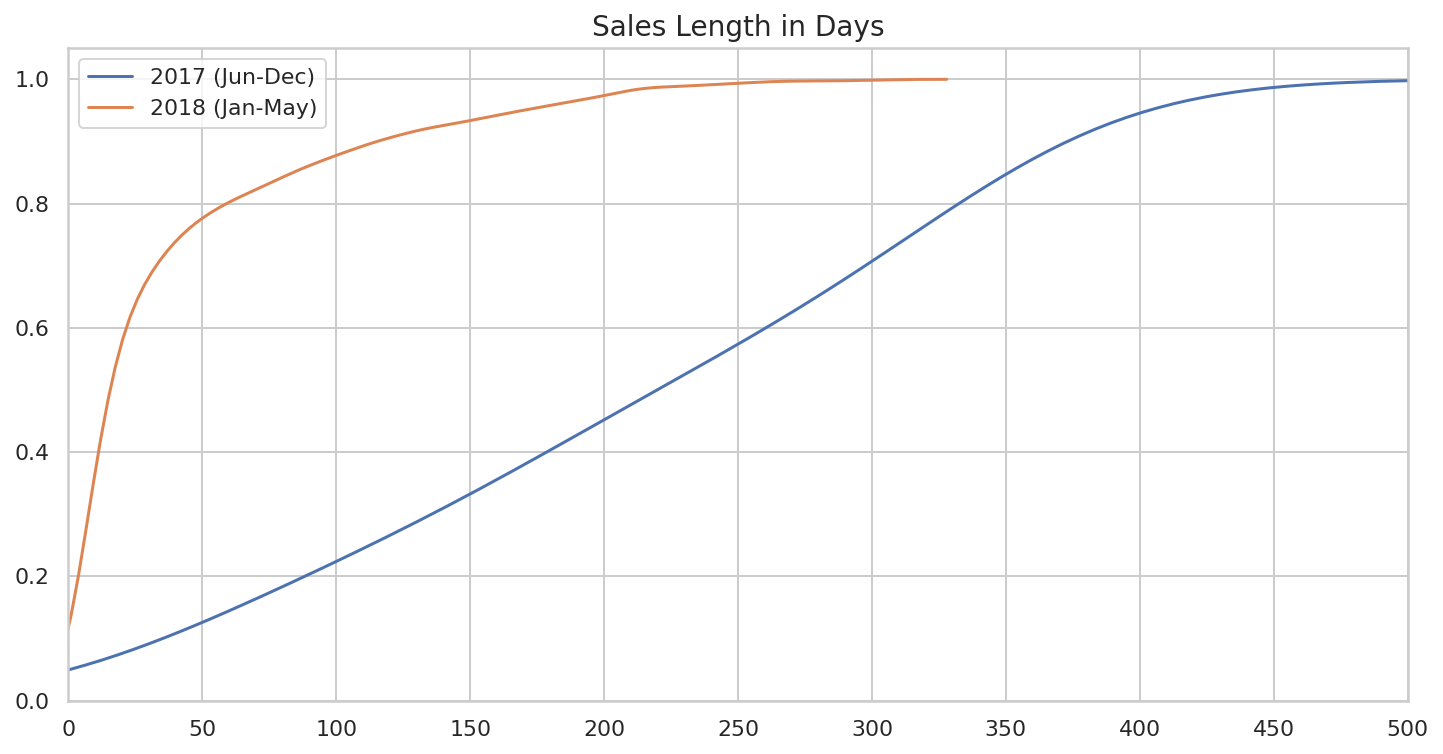

In [35]:
figure, ax = plt.subplots(figsize=(12,6))

sns.kdeplot(sales_length_2017,
            cumulative=True,
            label='2017 (Jun-Dec)',
            ax=ax)
sns.kdeplot(sales_length_2018,
            cumulative=True,
            label='2018 (Jan-May)',
            ax=ax)

ax.set_title('Sales Length in Days', fontsize=14)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlim(0,500);

## 2.4 Monthly Revenue by MQL 

In [36]:
print('There are',len(cd[cd.declared_monthly_revenue>0]), 'MQLs in profit') #total count
print('Only around',round(len(cd[cd.declared_monthly_revenue>0])/len(cd)*100, 2), '% in total') #total percent of data

There are 45 MQLs in profit
Only around 5.34 % in total


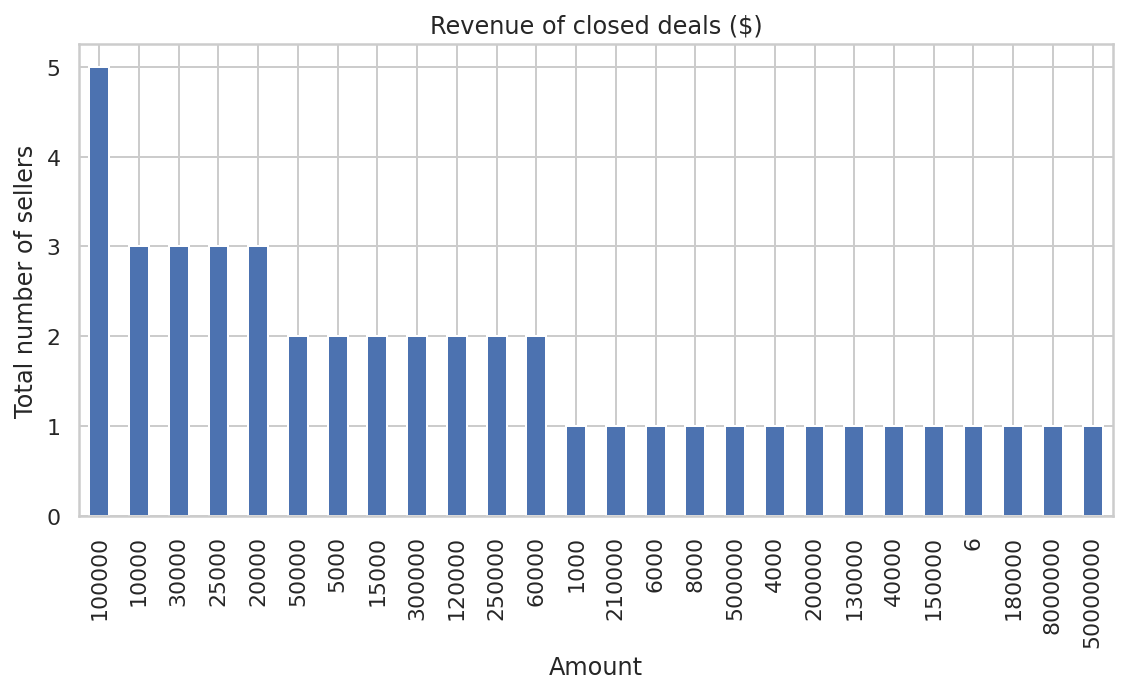

In [37]:
fig = plt.figure(figsize=(8,5))
cd[cd['declared_monthly_revenue']>0]['declared_monthly_revenue'].value_counts().plot.bar()
plt.title("Revenue of closed deals ($)")
plt.xlabel("Amount")
plt.ylabel("Total number of sellers")
fig.tight_layout()
#plt.savefig("revenue_disclosed.png")
plt.show()

## 2.5 Digging into Closed Deal
I will explore closed deals in more depth to see whether there is room for improvement in sales process. 

Specifically I'm looking into three dimensions of closed deals('lead type', 'business segment', 'business type') with 'lead behaviour profile' as an axis.

### 2.5.1 Characteristics of Closed Deal

In [38]:
# Bring 'closed deals' data
cd_profile = cd[cd['lead_behaviour_profile'].notna()].copy()

cd_profile['lead_behaviour_profile'].value_counts()

cat            407
unknown        177
eagle          123
wolf            95
shark           24
cat, wolf        8
eagle, cat       3
eagle, wolf      3
shark, wolf      1
shark, cat       1
Name: lead_behaviour_profile, dtype: int64

In [39]:
# Combine four types of mixed profiles(2.4%) into 'others'
profile_list = ['cat', 'eagle', 'wolf', 'shark']

cd_profile['lead_behaviour_profile(upd)'] = cd_profile['lead_behaviour_profile'].map(lambda profile: profile 
                                                                                     if profile in profile_list else 'others')
cd_profile['lead_behaviour_profile(upd)'].value_counts()

cat       407
others    193
eagle     123
wolf       95
shark      24
Name: lead_behaviour_profile(upd), dtype: int64

In [40]:
cd_profile[['lead_type', 'lead_behaviour_profile(upd)']].head()

lead_type lead_behaviour_profile(upd)
0  online_medium                         cat
1       industry                       eagle
2     online_big                         cat
3   online_small                      others
4       industry                        wolf

In [41]:
# Create 'profile - lead type' table
cols = cd_profile['lead_type'].value_counts().index
index = cd_profile['lead_behaviour_profile(upd)'].value_counts().index
index = index.rename('lead_behaviour_profile(upd)')

profile_leadType = pd.pivot_table(cd_profile,
                                  index='lead_behaviour_profile(upd)',
                                  columns='lead_type',
                                  values='seller_id',
                                  aggfunc='count',
                                  fill_value=0)

In [42]:
profile_leadType = profile_leadType.reindex(index)[cols]
profile_leadType

lead_type                    online_medium  online_big  industry  offline  \
lead_behaviour_profile(upd)                                                 
cat                                    157          72        49       49   
others                                  75          23        31       19   
eagle                                   46          11        25       22   
wolf                                    45          16        14        9   
shark                                    9           4         4        5   

lead_type                    online_small  online_beginner  online_top  \
lead_behaviour_profile(upd)                                              
cat                                    37               31           8   
others                                 21               15           4   
eagle                                  12                6           1   
wolf                                    6                5           0   
shark                                   1                0           1   

lead_type                    unknown  other  
lead_behaviour_profile(upd)                  
cat                                2      2  
others                             4      1  
eagle                              0      0  
wolf                               0      0  
shark                              0      0

In [43]:
# Create 'profile - business type' table
cols = cd_profile['business_type'].value_counts().index
index = cd_profile['lead_behaviour_profile(upd)'].value_counts().index

profile_businessType = pd.pivot_table(cd_profile,
                                      index='lead_behaviour_profile(upd)',
                                      columns='business_type',
                                      values='seller_id',
                                      aggfunc='count',
                                      fill_value=0)

profile_businessType = profile_businessType.reindex(index)[cols]
profile_businessType

business_type  reseller  manufacturer  unknown  other
cat                 284           116        5      2
others              135            56        1      1
eagle                83            37        3      0
wolf                 69            26        0      0
shark                16             7        1      0

In [44]:
# Create 'profile - business segment' table
cols = cd_profile['business_segment'].value_counts().index
index = cd_profile['lead_behaviour_profile(upd)'].value_counts().index

profile_segment = pd.pivot_table(cd_profile,
                                 index='lead_behaviour_profile(upd)',
                                 columns='business_segment',
                                 values='seller_id',
                                 aggfunc='count',
                                 fill_value=0)

profile_segment = profile_segment.reindex(index)[cols]
profile_segment

business_segment  home_decor  health_beauty  car_accessories  \
cat                       51             43               41   
others                    25             24               13   
eagle                     11             13               12   
wolf                      14              8                9   
shark                      4              5                2   

business_segment  household_utilities  construction_tools_house_garden  \
cat                                32                               35   
others                             15                               12   
eagle                              12                               11   
wolf                                9                                7   
shark                               3                                4   

business_segment  audio_video_electronics  computers  pet  food_supplement  \
cat                                    38         16   15               13   
others                                  9         10    6                8   
eagle                                   8          3    4                5   
wolf                                    8          5    4                2   
shark                                   1          0    1                0   

business_segment  food_drink  ...  jewerly  home_appliances  gifts  party  \
cat                        8  ...        3                3      3      2   
others                    10  ...        4                1      1      2   
eagle                      4  ...        0                1      1      1   
wolf                       4  ...        1                2      0      0   
shark                      0  ...        0                0      0      0   

business_segment  air_conditioning  other  games_consoles  perfume  unknown  \
cat                              0      2               1        1        0   
others                           1      1               1        0        1   
eagle                            0      0               0        1        0   
wolf                             1      0               0        0        0   
shark                            1      0               0        0        0   

business_segment  religious  
cat                       1  
others                    0  
eagle                     0  
wolf                      0  
shark                     0  

[5 rows x 34 columns]

#### Observation

In [45]:
Image(url= "https://i.imgur.com/hujp7Hc.jpg")

'lead_behaviour profile' is related to DISC personality test. Each type has the meaning as follows: https://www.discprofile.com/what-is-disc/overview/

- Closed deals are won in order of cat, eagle, wolf and shark based on descending volume in all three dimensions.
- In consideration of business context, it might make sense that conversion rate of wolf (accuracy-focused) or shark (result-focused) was lower than cat (cooperation-focused) or eagle (relationship-focused).

If so, sales performance could be improved by matching SDRs/SRs with MQLs properly.

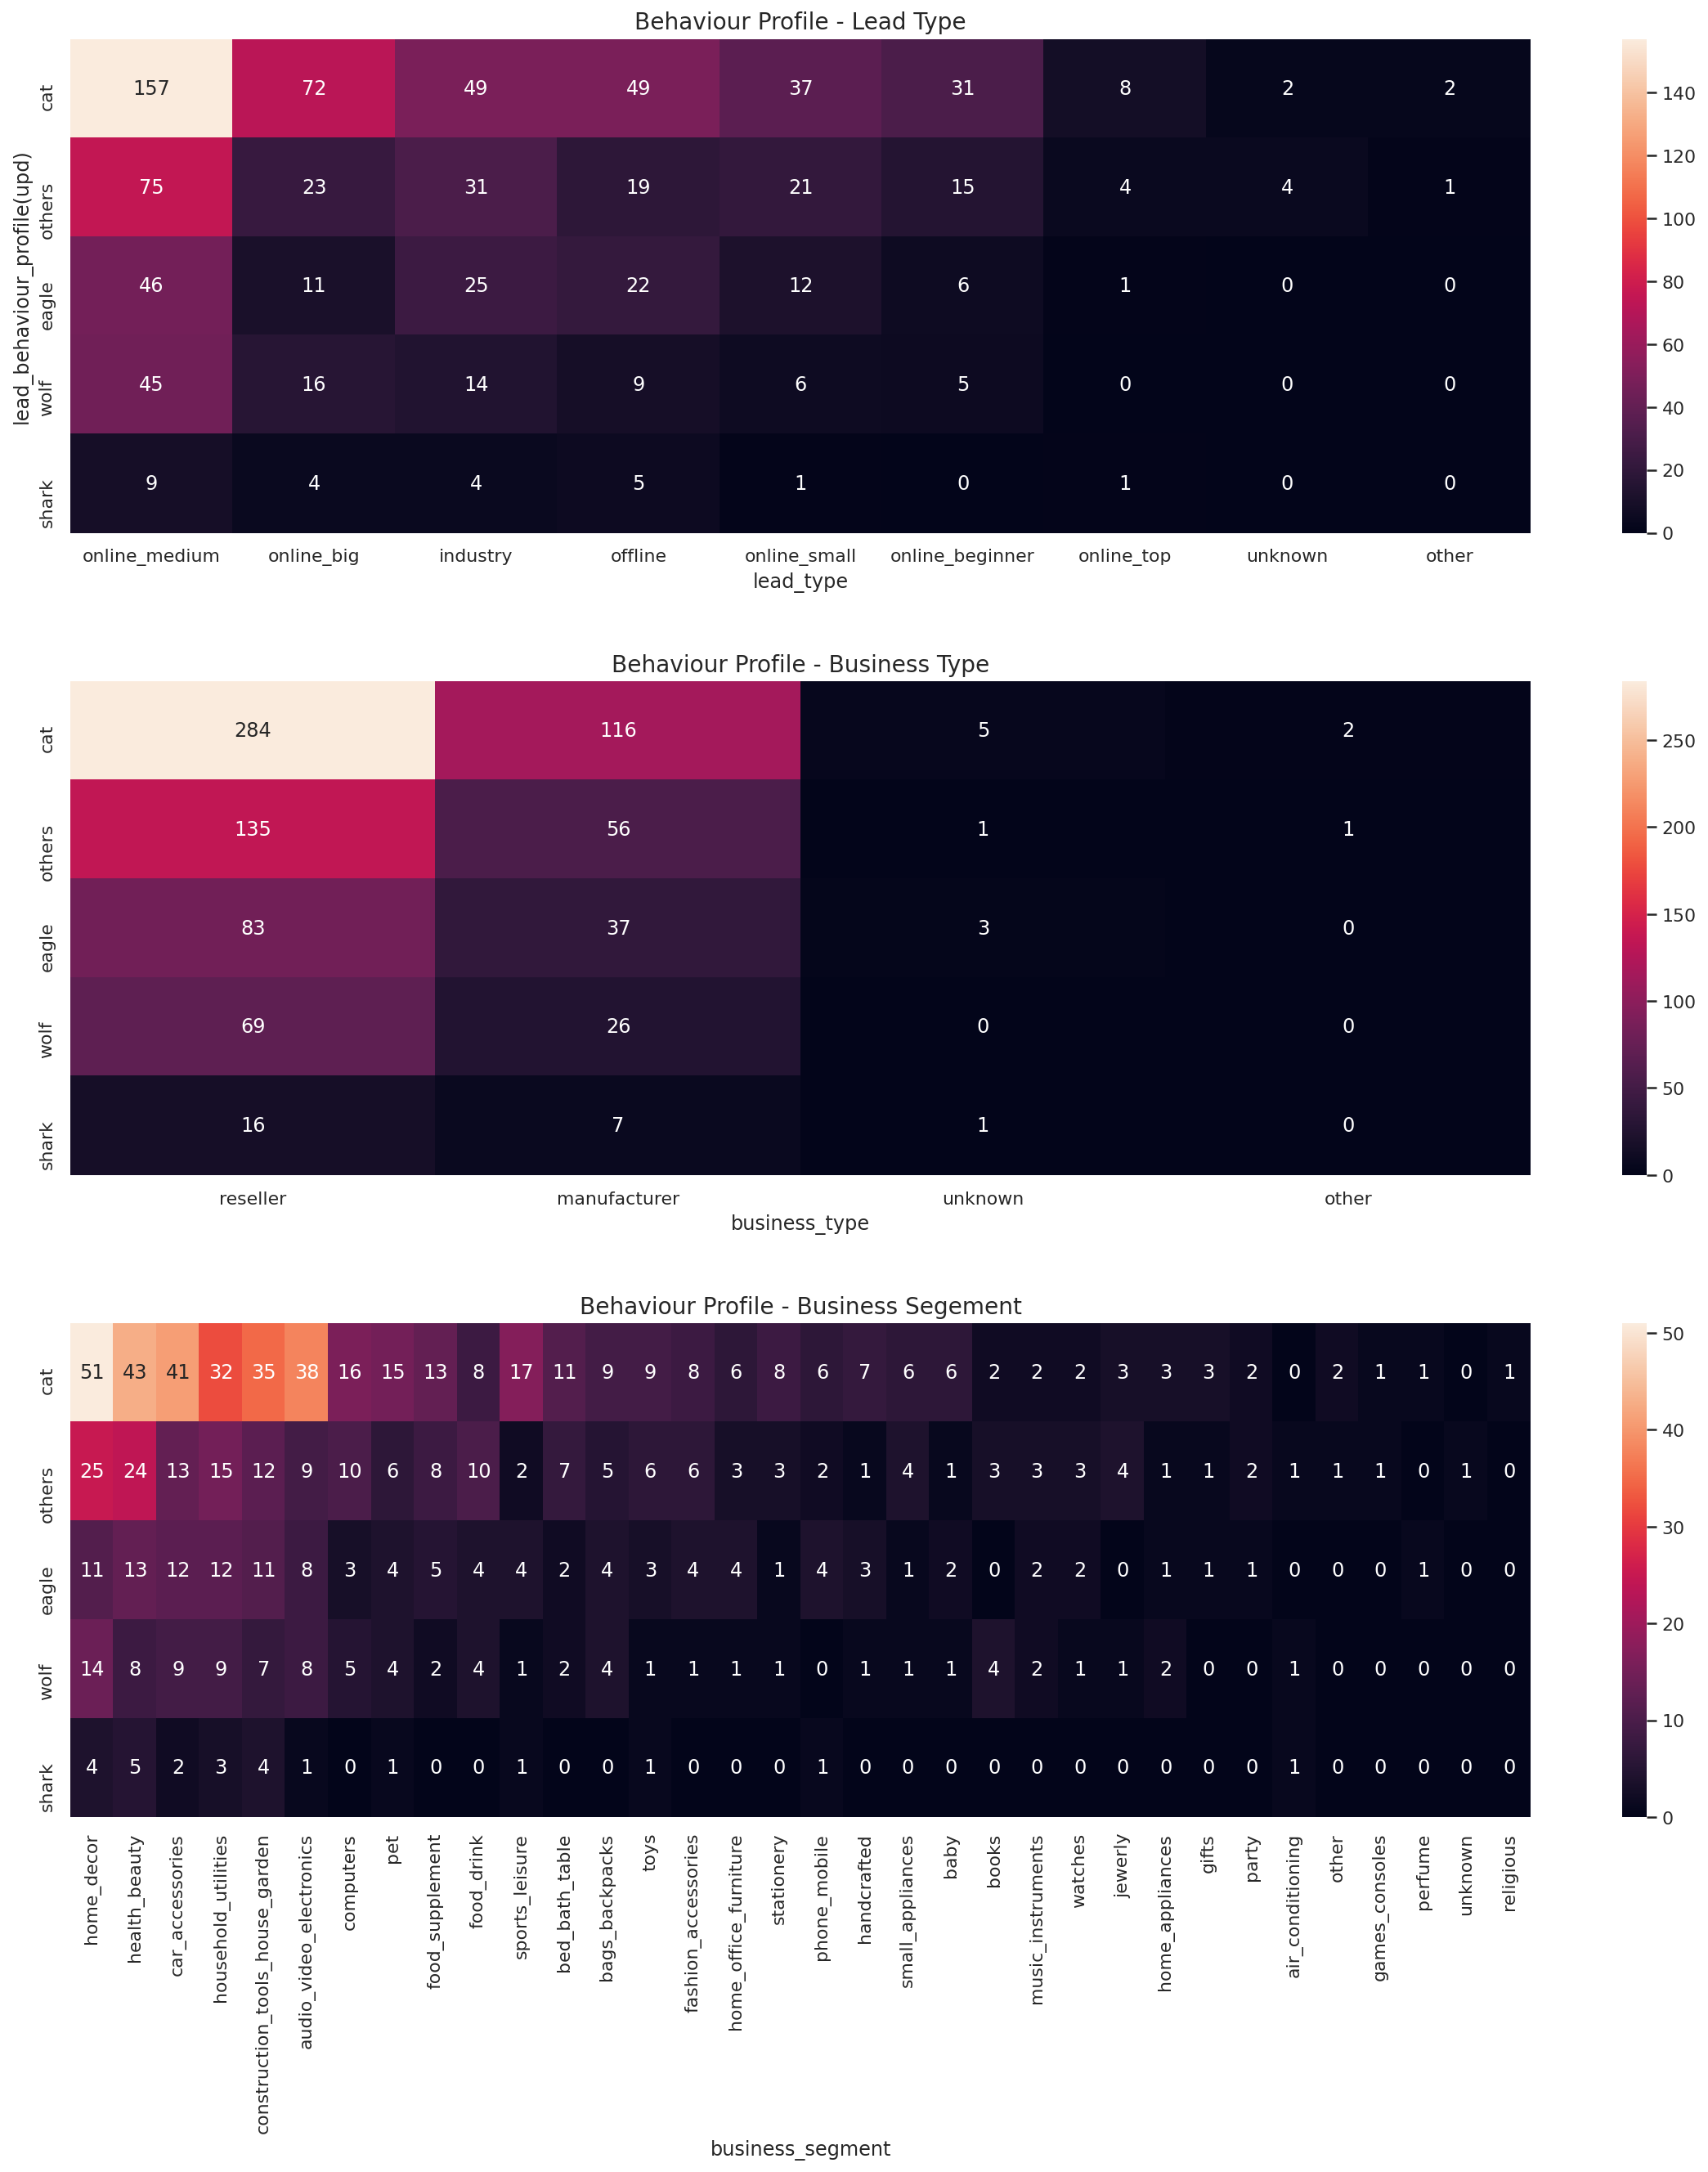

In [46]:
# Plot the above three tables
figure, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,20))
figure.subplots_adjust(hspace=0.3)

sns.heatmap(profile_leadType,
            annot=True,
            fmt='g',
            ax=ax1)
sns.heatmap(profile_businessType,
            annot=True,
            fmt='g',
            ax=ax2)
sns.heatmap(profile_segment,
            annot=True,
            fmt='g',
            ax=ax3)

ax1.set_title('Behaviour Profile - Lead Type', fontsize=14)
ax2.set_title('Behaviour Profile - Business Type', fontsize=14)
ax3.set_title('Behaviour Profile - Business Segement', fontsize=14);

### 2.5.2 SDR/SR Performance by Behaviour Profile

In [47]:
# Create 'profile-SDR' table
cols = cd_profile['sdr_id'].value_counts().index
index = cd_profile['lead_behaviour_profile(upd)'].value_counts().index

profile_sdr = pd.pivot_table(cd_profile,
                             index='lead_behaviour_profile(upd)',
                             columns='sdr_id',
                             values='seller_id',
                             aggfunc='count',
                             fill_value=0)

profile_sdr = profile_sdr.reindex(index)[cols] # Sort SDR in descending order of volume 
profile_sdr

sdr_id  4b339f9567d060bcea4f5136b9f5949e  068066e24f0c643eb1d089c7dd20cd73  \
cat                                   52                                43   
others                                29                                30   
eagle                                  9                                 3   
wolf                                  42                                 3   
shark                                  8                                 2   

sdr_id  56bf83c4bb35763a51c2baab501b4c67  9d12ef1a7eca3ec58c545c678af7869c  \
cat                                   24                                35   
others                                34                                 3   
eagle                                 16                                22   
wolf                                   0                                 6   
shark                                  0                                 0   

sdr_id  a8387c01a09e99ce014107505b92388c  9e4d1098a3b0f5da39b0bc48f9876645  \
cat                                   50                                37   
others                                 2                                 2   
eagle                                  4                                10   
wolf                                   3                                 3   
shark                                  0                                 3   

sdr_id  de63de0d10a6012430098db33c679b0b  370c9f455f93a9a96cbe9bea48e70033  \
cat                                    8                                26   
others                                41                                 2   
eagle                                  2                                14   
wolf                                   2                                 7   
shark                                  0                                 2   

sdr_id  09285259593c61296eef10c734121d5b  f42a2bd194f7802ab052a815c8de65b7  \
cat                                   25                                23   
others                                 0                                 4   
eagle                                  8                                 7   
wolf                                   7                                 7   
shark                                  2                                 1   

sdr_id  ...  0cdad77786224a7cefea567b8c75c3c1  \
cat     ...                                 2   
others  ...                                 0   
eagle   ...                                 0   
wolf    ...                                 0   
shark   ...                                 0   

sdr_id  6aa3b86a83d784b05f0e37e26b20860d  282f16e20d50cb18d05182e80f6b9dd6  \
cat                                    1                                 0   
others                                 0                                 0   
eagle                                  0                                 0   
wolf                                   0                                 1   
shark                                  1                                 0   

sdr_id  084b6fbb10729ed4da8c3d3f5a3ae7c9  19f3cd308f1455b3fa09a282e0d496f4  \
cat                                    1                                 1   
others                                 0                                 0   
eagle                                  0                                 0   
wolf                                   0                                 0   
shark                                  0                                 0   

sdr_id  5b7ce8c2b0fe4c2f52a0763046914ef4  e4a6222cdb5b34375400904f03d8e6a5  \
cat                                    1                                 0   
others                                 0                                 1   
eagle                                  0                                 0   
wolf                                   0                                 0   
shark                           

In [48]:
# Create 'profile-SR' table
cols = cd_profile['sr_id'].value_counts().index
index = cd_profile['lead_behaviour_profile(upd)'].value_counts().index

profile_sr = pd.pivot_table(cd_profile,
                            index='lead_behaviour_profile(upd)',
                            columns='sr_id',
                            values='seller_id',
                            aggfunc='count',
                            fill_value=0)

profile_sr = profile_sr.reindex(index)[cols] # Sort SR in descending order of volume
profile_sr

sr_id   4ef15afb4b2723d8f3d81e51ec7afefe  d3d1e91a157ea7f90548eef82f1955e3  \
cat                                   58                                28   
others                                40                                29   
eagle                                 23                                12   
wolf                                  12                                11   
shark                                  0                                 2   

sr_id   6565aa9ce3178a5caf6171827af3a9ba  85fc447d336637ba1df43e793199fbc8  \
cat                                   31                                41   
others                                19                                 1   
eagle                                 13                                 7   
wolf                                  11                                11   
shark                                  0                                 4   

sr_id   495d4e95a8cf8bbf8b432b612a2aa328  2695de1affa7750089c0455f8ce27021  \
cat                                   30                                34   
others                                18                                 8   
eagle                                  6                                 9   
wolf                                   7                                 6   
shark                                  2                                 2   

sr_id   fbf4aef3f6915dc0c3c97d6812522f6a  de63de0d10a6012430098db33c679b0b  \
cat                                   30                                37   
others                                16                                 0   
eagle                                  9                                 7   
wolf                                   2                                 5   
shark                                  2                                 4   

sr_id   9ae085775a198122c5586fa830ff7f2b  c638112b43f1d1b86dcabb0da720c901  \
cat                                   12                                17   
others                                29                                11   
eagle                                  4                                 5   
wolf                                   5                                 3   
shark                                  1                                 0   

sr_id   ...  a8387c01a09e99ce014107505b92388c  \
cat     ...                                14   
others  ...                                 3   
eagle   ...                                 6   
wolf    ...                                 3   
shark   ...                                 0   

sr_id   9e4d1098a3b0f5da39b0bc48f9876645  56bf83c4bb35763a51c2baab501b4c67  \
cat                                   16                                17   
others                                 0                                 1   
eagle                                  6                                 2   
wolf                                   0                                 2   
shark                                  2                                 2   

sr_id   34d40cdaf94010a1d05b0d6212f9e909  4b339f9567d060bcea4f5136b9f5949e  \
cat                                    3                                 7   
others                                 3                                 0   
eagle                                  4                                 0   
wolf                                   0                                 2   
shark                                  0                                 0   

sr_id   9749123c950bf8363ace42cb1c2d0815  9d12ef1a7eca3ec58c545c678af7869c  \
cat                                    2                                 3   
others                                 0                                 2   
eagle                                  0                                 0   
wolf                                   4                                 1   
shark                           

##### Observation

1. SDR
    - 1st and 3rd SDRs are eminent in handling cat.
    - 2nd and 10th SDRs are specialized in eagle.
    - 1st SDR is also unparalleled in dealing with wolf.
    - As to shark 1st SDR is better than the others, but not enough to claim to be an expert.
    - SDR is the first contact point of MQL so they do not know the lead's behaviour profile yet. Therefore sharing top performers' -expertise in cat, eagle or wolf can enhance team performance.
    - In regard to shark, external resources may be helpful in building capability.

2. SR
    - 1st SR has matchless skills in managing both cat and eagle.
    - SRs on the first four places are good at handling wolf, but not as much as their highest performing fields.
    - 2nd and 5th are the best performers in regard to shark, but hard to say 'proficient'.
    - Eagle can be assigned to 2nd SR. Further, spreading knowledge among the team can improve team performance.
    - Like SDR, external knowledge sources can be a way to boost performance.

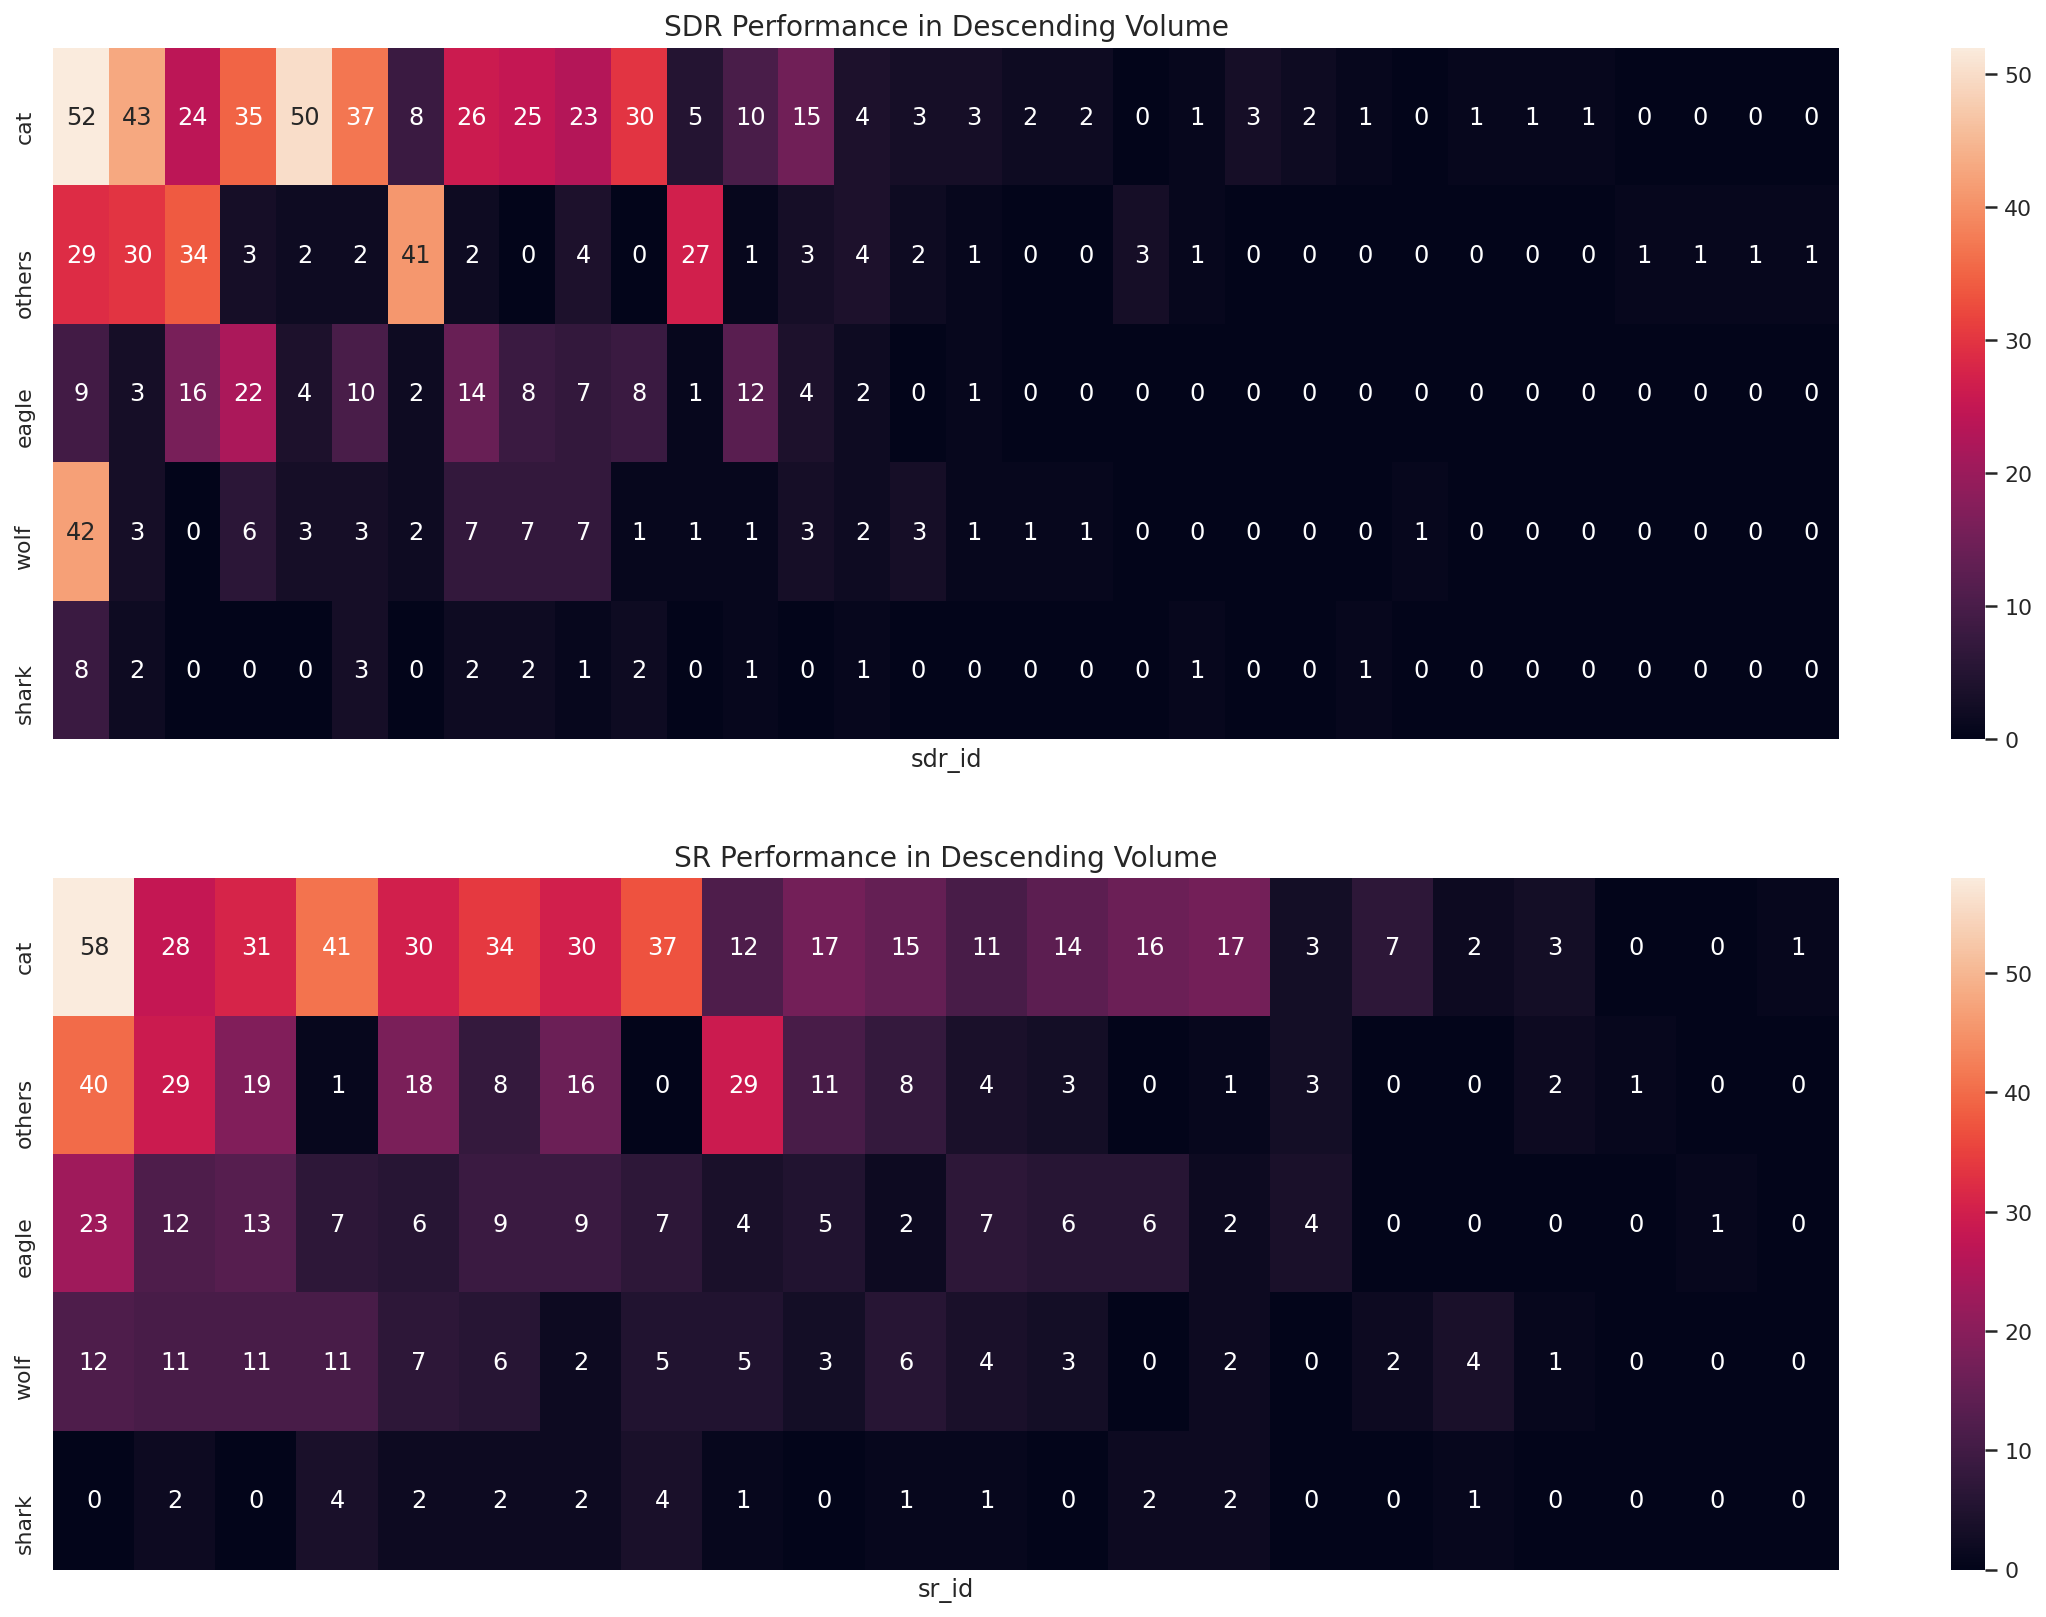

In [49]:
# Plot the two tables
figure, (ax1,ax2) = plt.subplots(2, 1, figsize=(20,14))
figure.subplots_adjust(hspace=0.2)

sns.heatmap(profile_sdr,
            annot=True,
            fmt='g',
            ax=ax1)
sns.heatmap(profile_sr,
            annot=True,
            fmt='g',
            ax=ax2)

ax1.set_title('SDR Performance in Descending Volume', fontsize=14)
ax2.set_title('SR Performance in Descending Volume', fontsize=14)
ax1.set_xticks([])
ax2.set_xticks([]);

# 3. CLOSED DEAL PERFORMANCE OVERVIEW

In [50]:
all_data = pd.merge(cd,order_items,
                how='inner', on='seller_id')
all_data = pd.merge(all_data, orders,
                how='inner', on='order_id')
all_data = pd.merge(all_data, products,
                how='inner', on='product_id')
all_data = pd.merge(all_data, product_translation,
                how='left', on='product_category_name') # There are some data without english names
all_data.shape

(5044, 32)

In [51]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

In [52]:
# Sort out orders not devliered to customers
all_data = all_data[all_data['order_status'] == 'delivered']

# Add a 'year-month' column
all_data['order_purchase_timestamp(y-m)'] = all_data['order_purchase_timestamp'].dt.to_period('M')

print(all_data.shape)
all_data.head(3)

(4984, 33)


mql_id                         seller_id  \
0  5420aad7fec3549a85876ba1c529bd84  2c43fb513632d29b3b58df74816f1b06   
1  5420aad7fec3549a85876ba1c529bd84  2c43fb513632d29b3b58df74816f1b06   
2  5420aad7fec3549a85876ba1c529bd84  2c43fb513632d29b3b58df74816f1b06   

                             sdr_id                             sr_id  \
0  a8387c01a09e99ce014107505b92388c  4ef15afb4b2723d8f3d81e51ec7afefe   
1  a8387c01a09e99ce014107505b92388c  4ef15afb4b2723d8f3d81e51ec7afefe   
2  a8387c01a09e99ce014107505b92388c  4ef15afb4b2723d8f3d81e51ec7afefe   

             won_date business_segment      lead_type lead_behaviour_profile  \
0 2018-02-26 19:58:00              pet  online_medium                    cat   
1 2018-02-26 19:58:00              pet  online_medium                    cat   
2 2018-02-26 19:58:00              pet  online_medium                    cat   

  business_type  declared_monthly_revenue  ... product_category_name  \
0      reseller                         0  ...              pet_shop   
1      reseller                         0  ...    ferramentas_jardim   
2      reseller                         0  ...              pet_shop   

   product_name_lenght product_description_lenght product_photos_qty  \
0                 56.0                     1538.0                2.0   
1                 25.0                      432.0                1.0   
2                 53.0                     1494.0                2.0   

   product_weight_g  product_length_cm product_height_cm product_width_cm  \
0             625.0               23.0              17.0             19.0   
1            2825.0               29.0              29.0             29.0   
2             900.0               26.0              19.0             23.0   

  product_category_name_english order_purchase_timestamp(y-m)  
0                      pet_shop                       2018-06  
1                  garden_tools                       2018-07  
2                      pet_shop                       2018-06  

[3 rows x 33 columns]

## 3.1 Monthly Revenues by Business Segment

In [53]:
cols = all_data.groupby(by='business_segment') \
           .price \
           .sum() \
           .sort_values(ascending=False) \
           .index

monthly_segment_revenue = all_data.groupby(['order_purchase_timestamp(y-m)', 'business_segment']) \
                              .price \
                              .sum() \
                              .unstack(level=1, fill_value=0)

monthly_segment_revenue = monthly_segment_revenue[cols]
monthly_segment_revenue

business_segment                watches  health_beauty  household_utilities  \
order_purchase_timestamp(y-m)                                                 
2018-01                            0.00           0.00                 0.00   
2018-02                         5935.46          28.00               443.60   
2018-03                        27439.45         567.50              2233.49   
2018-04                        21918.00        6793.63              5008.94   
2018-05                        31286.81       17073.44             10153.85   
2018-06                        11547.88       25298.46             10497.65   
2018-07                         7393.44       20035.20             11568.15   
2018-08                        10380.04       19128.11             11375.19   

business_segment               audio_video_electronics  small_appliances  \
order_purchase_timestamp(y-m)                                              
2018-01                                           0.00              0.00   
2018-02                                          20.00            140.00   
2018-03                                        2842.87          12620.00   
2018-04                                        3074.49          12529.90   
2018-05                                        9813.11          14447.50   
2018-06                                       10067.49           3909.80   
2018-07                                       12017.70           1187.20   
2018-08                                       11587.78           2840.47   

business_segment               home_decor       pet  \
order_purchase_timestamp(y-m)                         
2018-01                              0.00      0.00   
2018-02                           1042.50    211.96   
2018-03                            531.50    377.86   
2018-04                           2857.34   4586.34   
2018-05                           6134.17   3316.38   
2018-06                           8414.03   6292.87   
2018-07                          10980.97   9526.63   
2018-08                          13848.82  16186.79   

business_segment               construction_tools_house_garden  \
order_purchase_timestamp(y-m)                                    
2018-01                                                   0.00   
2018-02                                                 677.56   
2018-03                                                1154.44   
2018-04                                                2611.66   
2018-05                                                6499.96   
2018-06                                                4591.75   
2018-07                                                8485.62   
2018-08                                                7986.08   

business_segment               car_accessories  home_appliances  ...    books  \
order_purchase_timestamp(y-m)                                    ...            
2018-01                                   0.00             0.00  ...     0.00   
2018-02                                 178.90             0.00  ...     0.00   
2018-03                                 347.00           145.97  ...    19.90   
2018-04                                4266.00           869.98  ...   344.45   
2018-05                                3451.86           435.00  ...  3023.27   
2018-06                                5414.06          2494.49  ...  1020.19   
2018-07                                6637.60         16278.83  ...  1554.74   
2018-08                                9710.56          6016.90  ...   980.34   

business_segment               music_instruments     toys  phone_mobile  \
order_purchase_timestamp(y-m)                                             
2018-01                                     0.00     0.00          0.00   
2018-02                                  1447.90   234.69          0.00   
2018-03                                   179.90   238.10        642.00   
2018-04                                   439.79  

- Total revenues across 29 segments came in at 664,858 in the first eight months of 2018.
- The biggest segment was 'watches', which generated 17.4% of total revenues (115,901).

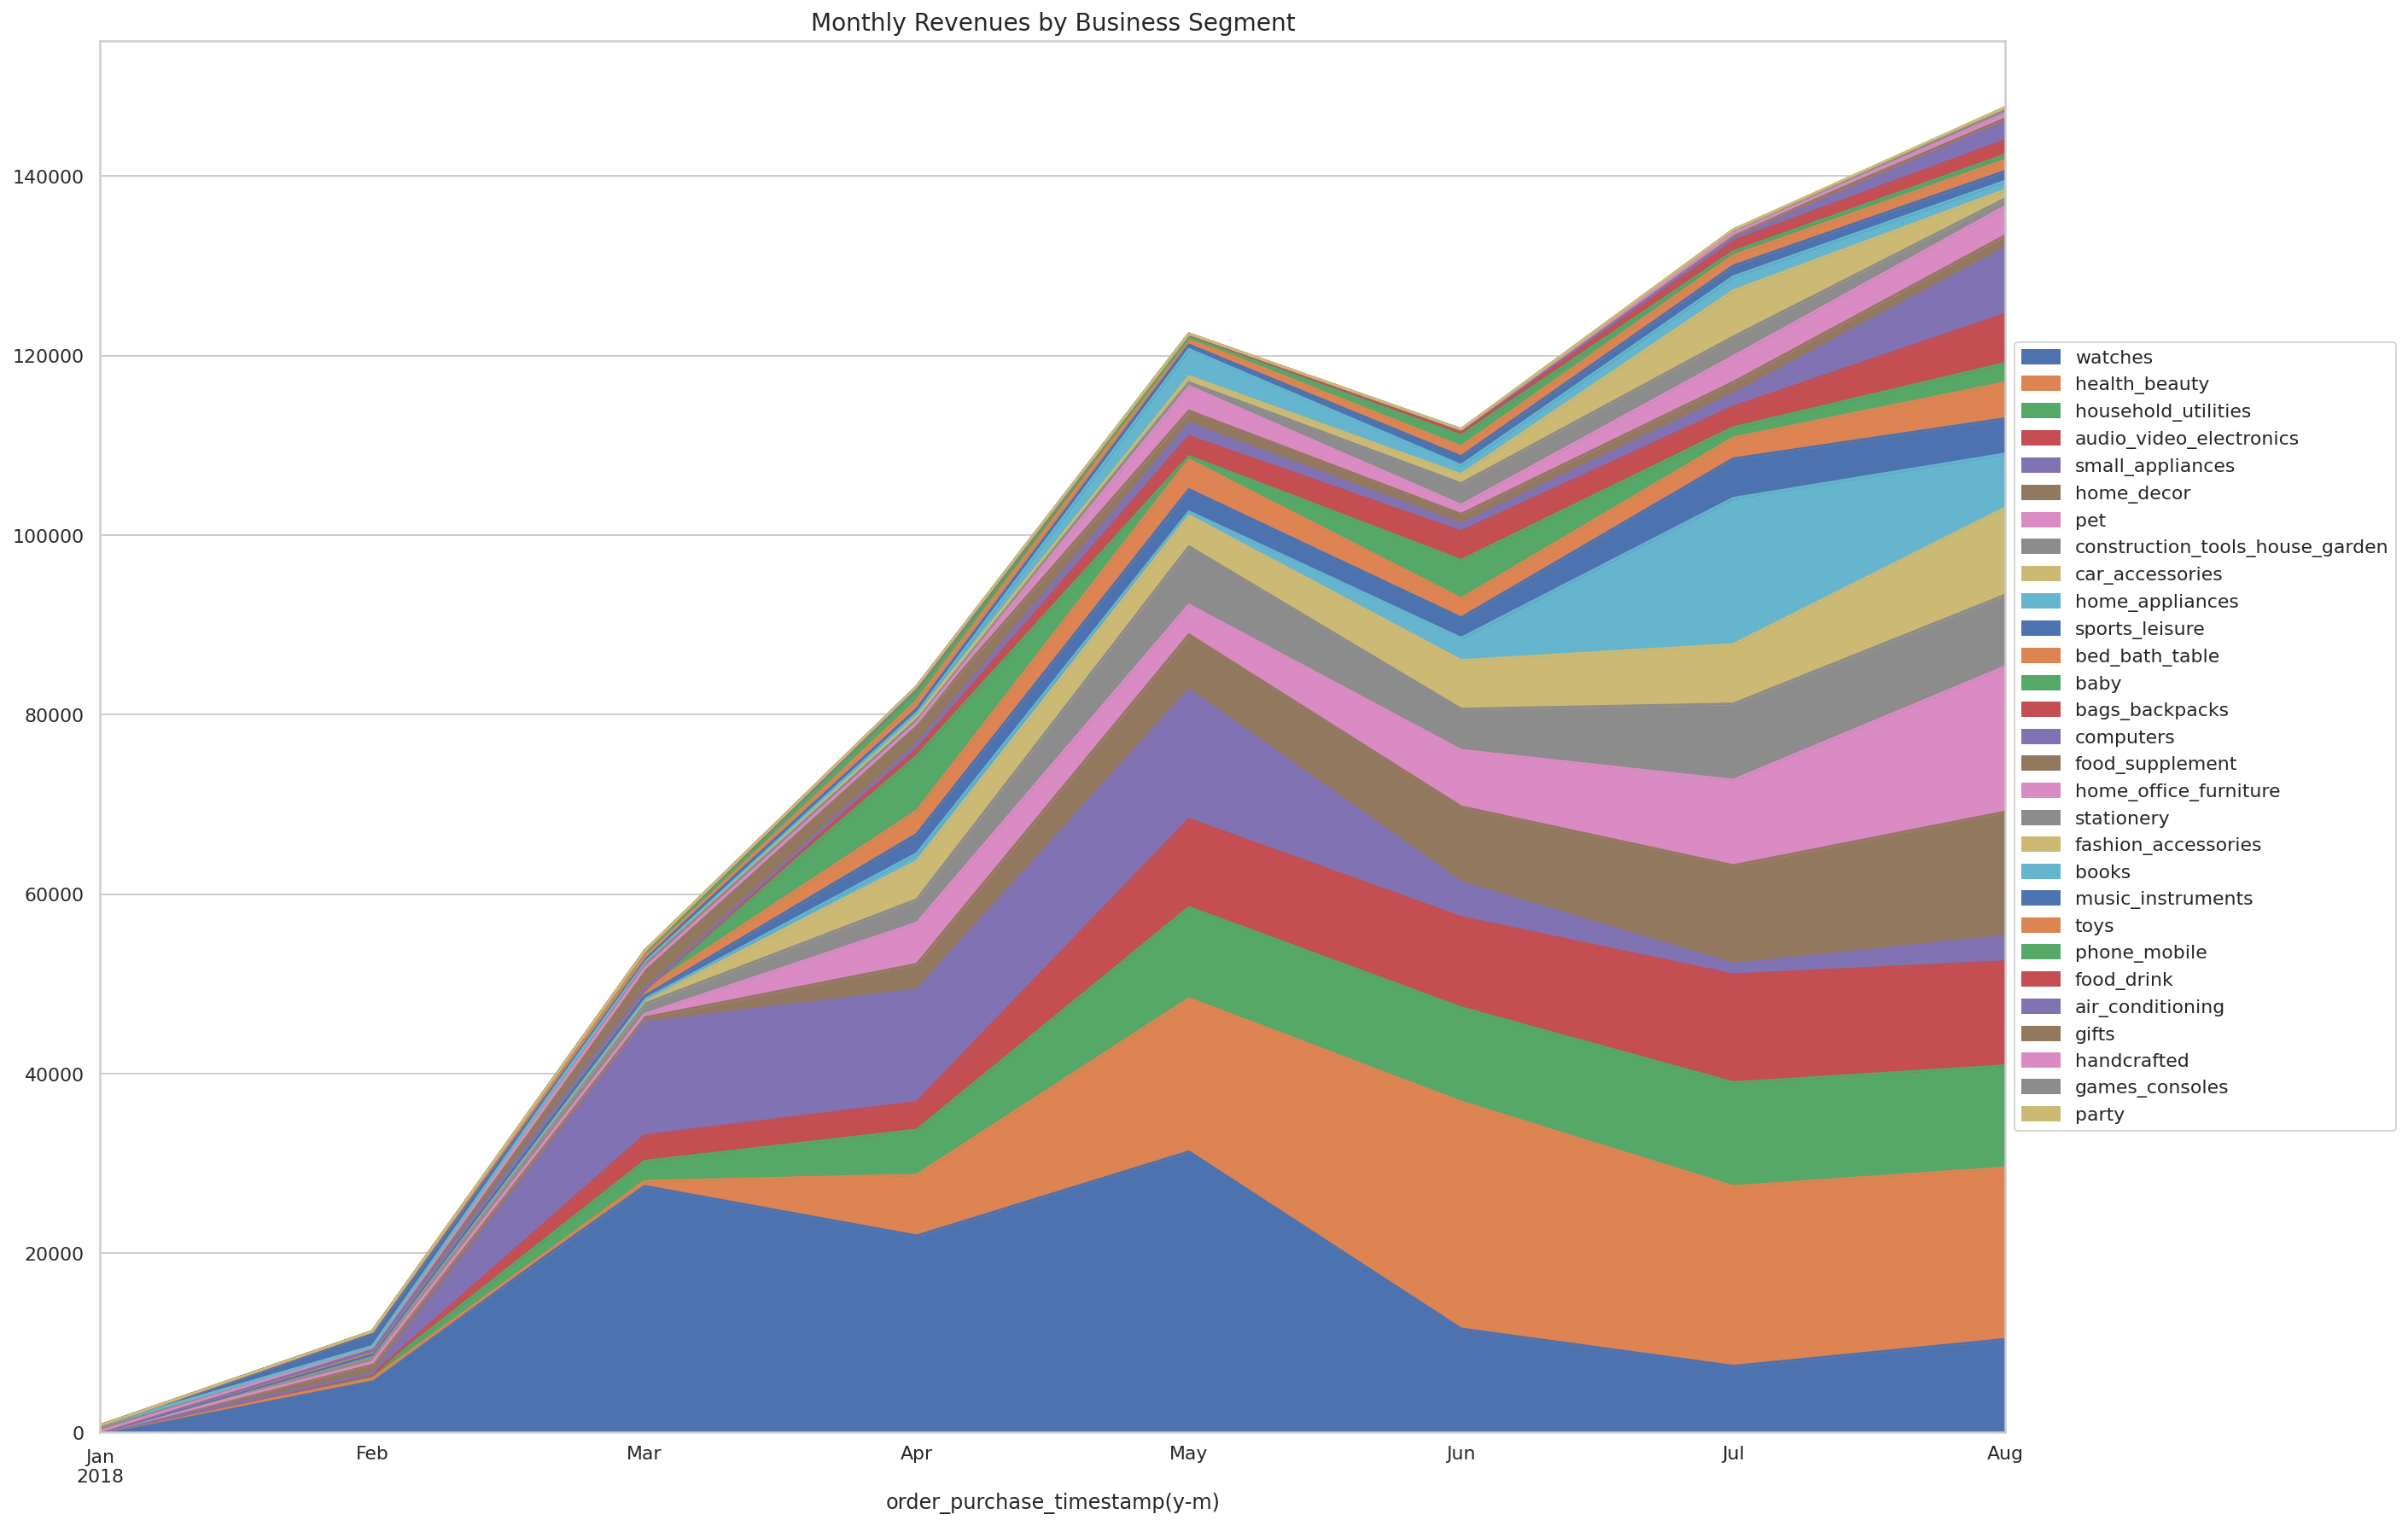

In [54]:
# Plot the monthly revenues by segment
monthly_segment_revenue.plot.area(figsize=(20,15))

plt.title('Monthly Revenues by Business Segment', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

### 3.1.1 Watches Revenue by Product Category

In [55]:
# Create watches segment dataframe
watches = all_data[all_data['business_segment'] == 'watches']
watches.shape

(586, 33)

In [56]:
# Create monthly revenues by product category
cols = watches.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).index

# monthly_revenue_category = pd.pivot_table(watches,
#                                  index='order_purchase_timestamp(y-m)',
#                                  columns='product_category_name_english',
#                                  values='price',
#                                  aggfunc='sum',
#                                  fill_value=0)

monthly_revenue_category = watches.groupby(['order_purchase_timestamp(y-m)', 'product_category_name_english']) \
                                  .price \
                                  .sum() \
                                  .unstack(level=1, fill_value=0)

monthly_revenue_category = monthly_revenue_category[cols]
monthly_revenue_category

product_category_name_english  watches_gifts    audio  electronics  \
order_purchase_timestamp(y-m)                                        
2018-02                              5065.36   590.00       280.10   
2018-03                             19106.69  7547.76       240.00   
2018-04                             15588.14  5609.89       719.97   
2018-05                             29070.81  2216.00         0.00   
2018-06                              9727.88  1172.00         0.00   
2018-07                              5747.44   876.00       370.00   
2018-08                              8077.86   550.00      1464.58   

product_category_name_english  sports_leisure  cool_stuff  market_place  \
order_purchase_timestamp(y-m)                                             
2018-02                                   0.0         0.0           0.0   
2018-03                                 545.0         0.0           0.0   
2018-04                                   0.0         0.0           0.0   
2018-05                                   0.0         0.0           0.0   
2018-06                                 468.0       180.0           0.0   
2018-07                                   0.0       180.0           0.0   
2018-08                                   0.0         0.0         287.6   

product_category_name_english  perfumery  
order_purchase_timestamp(y-m)             
2018-02                              0.0  
2018-03                              0.0  
2018-04                              0.0  
2018-05                              0.0  
2018-06                              0.0  
2018-07                            220.0  
2018-08                              0.0

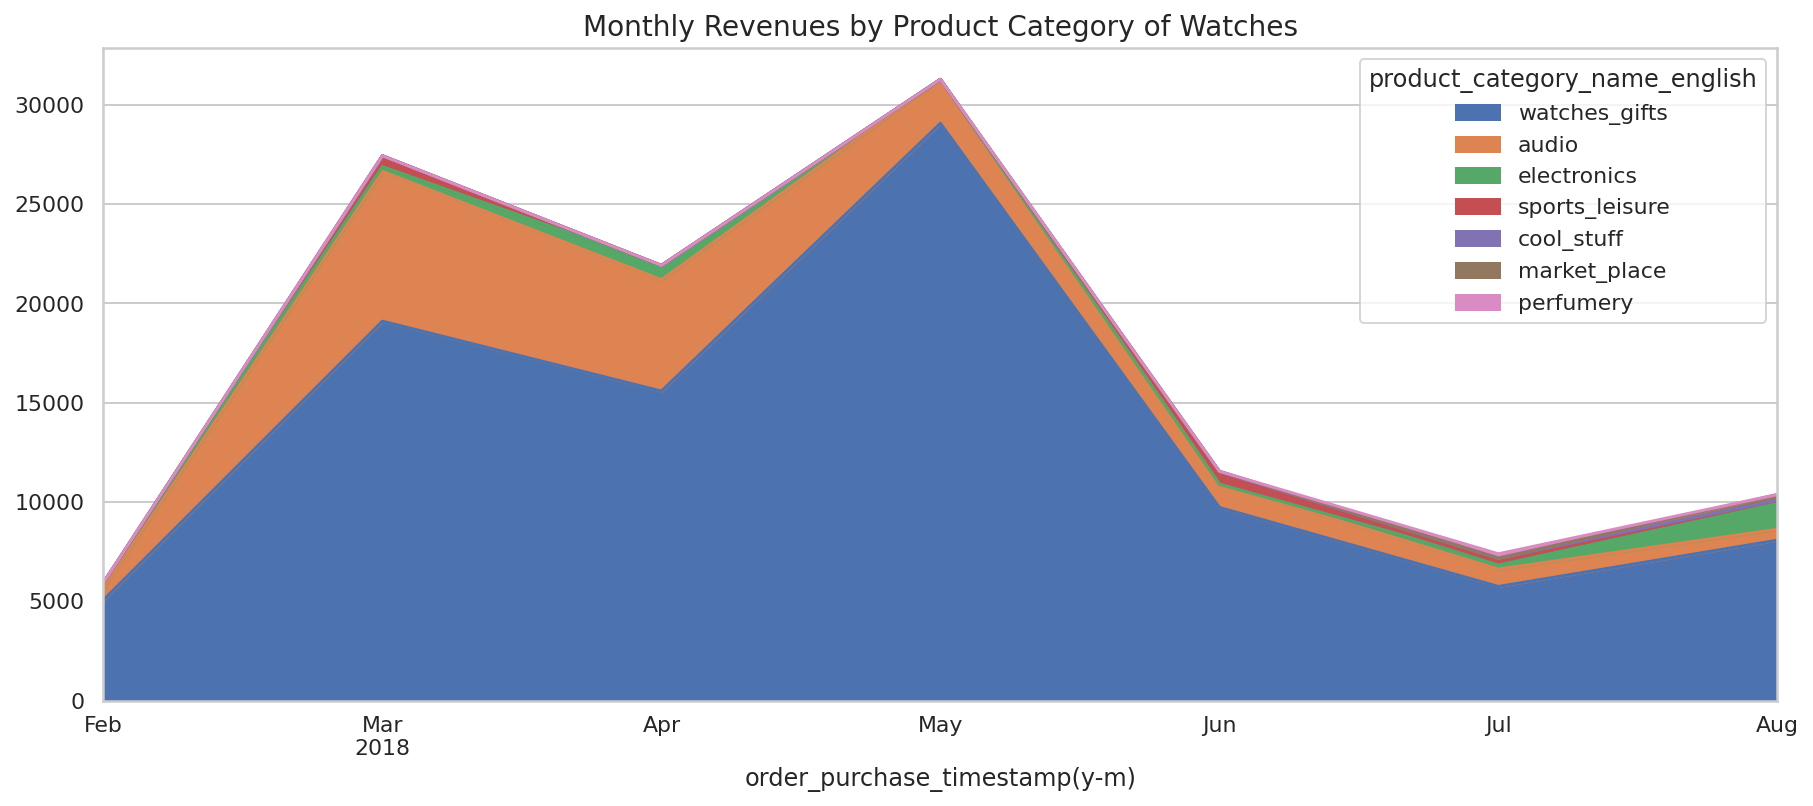

In [57]:
# Plot the monthly revenues by category
monthly_revenue_category.plot.area(figsize=(15,6))
plt.title('Monthly Revenues by Product Category of Watches', fontsize=14);

### 3.1.2 Watches Revenue by Seller

In [58]:
# Create 'seller - product category' table
cols = watches.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).index

watches_seller_revenue = watches.groupby(['seller_id', 'product_category_name_english']) \
                                ['price'].sum().unstack(level=1, fill_value=0)

watches_seller_revenue = watches_seller_revenue[cols]
watches_seller_revenue['total'] = watches_seller_revenue.sum(axis=1)

watches_seller_revenue

product_category_name_english     watches_gifts     audio  electronics  \
seller_id                                                                
7d13fca15225358621be4086e1eb0964       88919.28  18561.65      3074.65   
bce6a5ecf98e99fd2a8868b15c51f04b        3464.90      0.00         0.00   

product_category_name_english     sports_leisure  cool_stuff  market_place  \
seller_id                                                                    
7d13fca15225358621be4086e1eb0964          1013.0       360.0         287.6   
bce6a5ecf98e99fd2a8868b15c51f04b             0.0         0.0           0.0   

product_category_name_english     perfumery      total  
seller_id                                               
7d13fca15225358621be4086e1eb0964      220.0  112436.18  
bce6a5ecf98e99fd2a8868b15c51f04b        0.0    3464.90

In [59]:
watches_seller_revenue.T

seller_id                      7d13fca15225358621be4086e1eb0964  \
product_category_name_english                                     
watches_gifts                                          88919.28   
audio                                                  18561.65   
electronics                                             3074.65   
sports_leisure                                          1013.00   
cool_stuff                                               360.00   
market_place                                             287.60   
perfumery                                                220.00   
total                                                 112436.18   

seller_id                      bce6a5ecf98e99fd2a8868b15c51f04b  
product_category_name_english                                    
watches_gifts                                            3464.9  
audio                                                       0.0  
electronics                                                 0.0  
sports_leisure                                              0.0  
cool_stuff                                                  0.0  
market_place                                                0.0  
perfumery                                                   0.0  
total                                                    3464.9

#### Observation
- Though 'watches' segment is the largest part of revenue, it has only two sellers.
- Furthermore, the leading seller generated 97.0% of segment revenue.

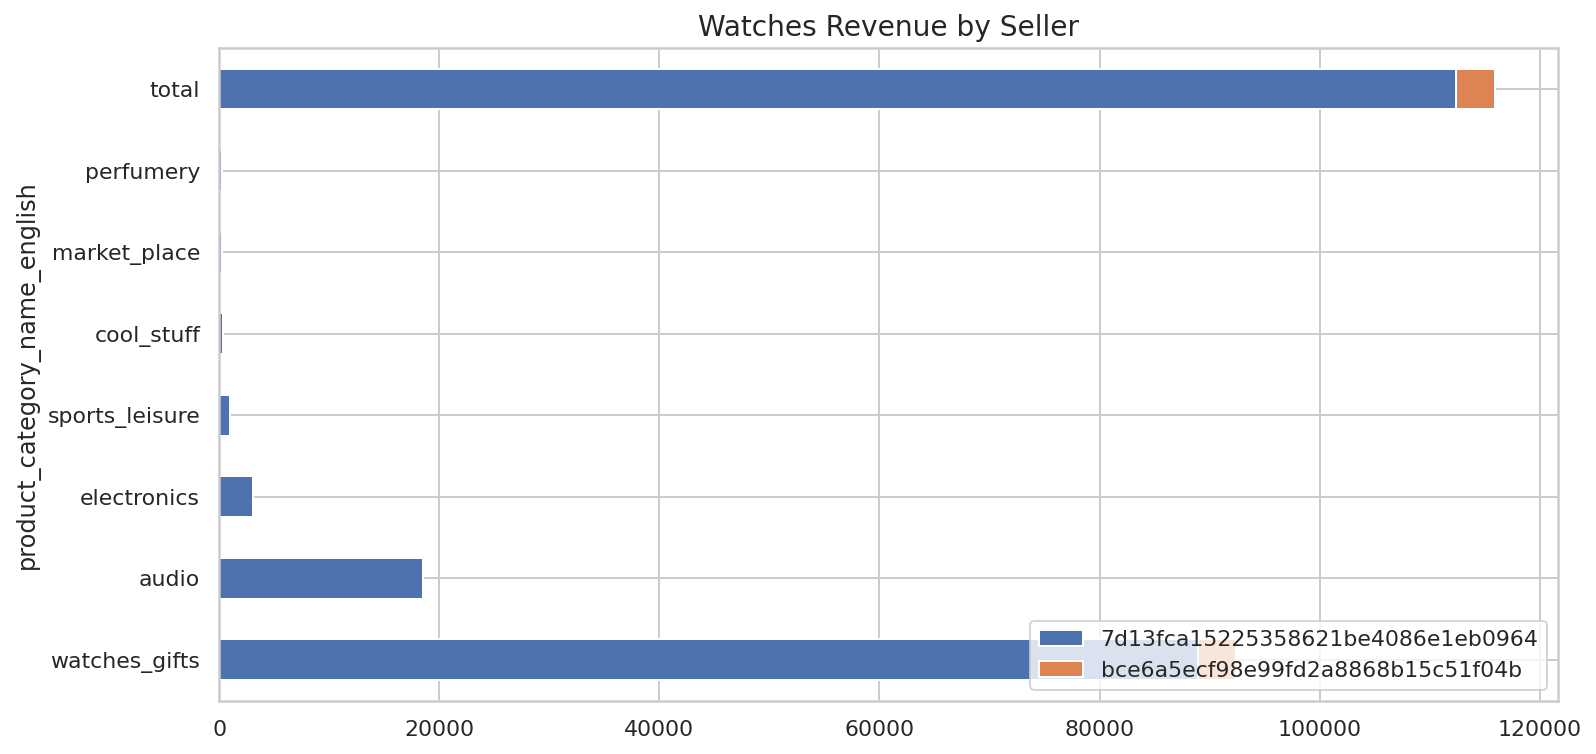

In [60]:
# Plot the above table
watches_seller_revenue.T.plot.barh(stacked=True, figsize=(12,6))

plt.title('Watches Revenue by Seller', fontsize=14)
plt.legend(loc='lower right');


#### Obsevation
Let's uncover information about two sellers.
- The leading seller is 'online big', perhaps a large internet-based company with high market share or strong brand awareness.
- And its business type is 'reseller'. That explains why there are irrelevant product categories in 'watches' segment. The fact that a business segment may have unrelated product categories means revenue analysis should be conducted based on 'product category' rather than 'business segment'.

In [61]:
index = watches[watches['product_category_name_english'] == 'watches_gifts'].groupby('product_id') \
                ['price'].sum().sort_values(ascending=False).index
product_seller_revenue = watches[watches['product_category_name_english'] == 'watches_gifts'] \
                                  .groupby(['seller_id', 'product_id']) \
                                  ['price'].sum().unstack(level=0, fill_value=0)

product_seller_revenue = product_seller_revenue.reindex(index)
product_seller_revenue.head()

seller_id                         7d13fca15225358621be4086e1eb0964  \
product_id                                                           
53b36df67ebb7c41585e8d54d6772e08                          22574.43   
1a080577618e7fe4d9ddd8fb2b47a964                           8567.99   
6f3b5b605d91b7439c5e3f5a8dffeea7                           6970.00   
f819f0c84a64f02d3a5606ca95edd272                           5558.90   
461f43be3bdf8844e65b62d9ac2c7a5a                           4906.00   

seller_id                         bce6a5ecf98e99fd2a8868b15c51f04b  
product_id                                                          
53b36df67ebb7c41585e8d54d6772e08                               0.0  
1a080577618e7fe4d9ddd8fb2b47a964                               0.0  
6f3b5b605d91b7439c5e3f5a8dffeea7                               0.0  
f819f0c84a64f02d3a5606ca95edd272                            1222.9  
461f43be3bdf8844e65b62d9ac2c7a5a                               0.0

#### Observation
- 'watches_gifts' may be a relatively homogeneous market so securing popular items is more important than pursuing a broad range of products. It implies that a category leader should be acquired to boost category revenue.
- Six best-selling items form 60% of category revenue.

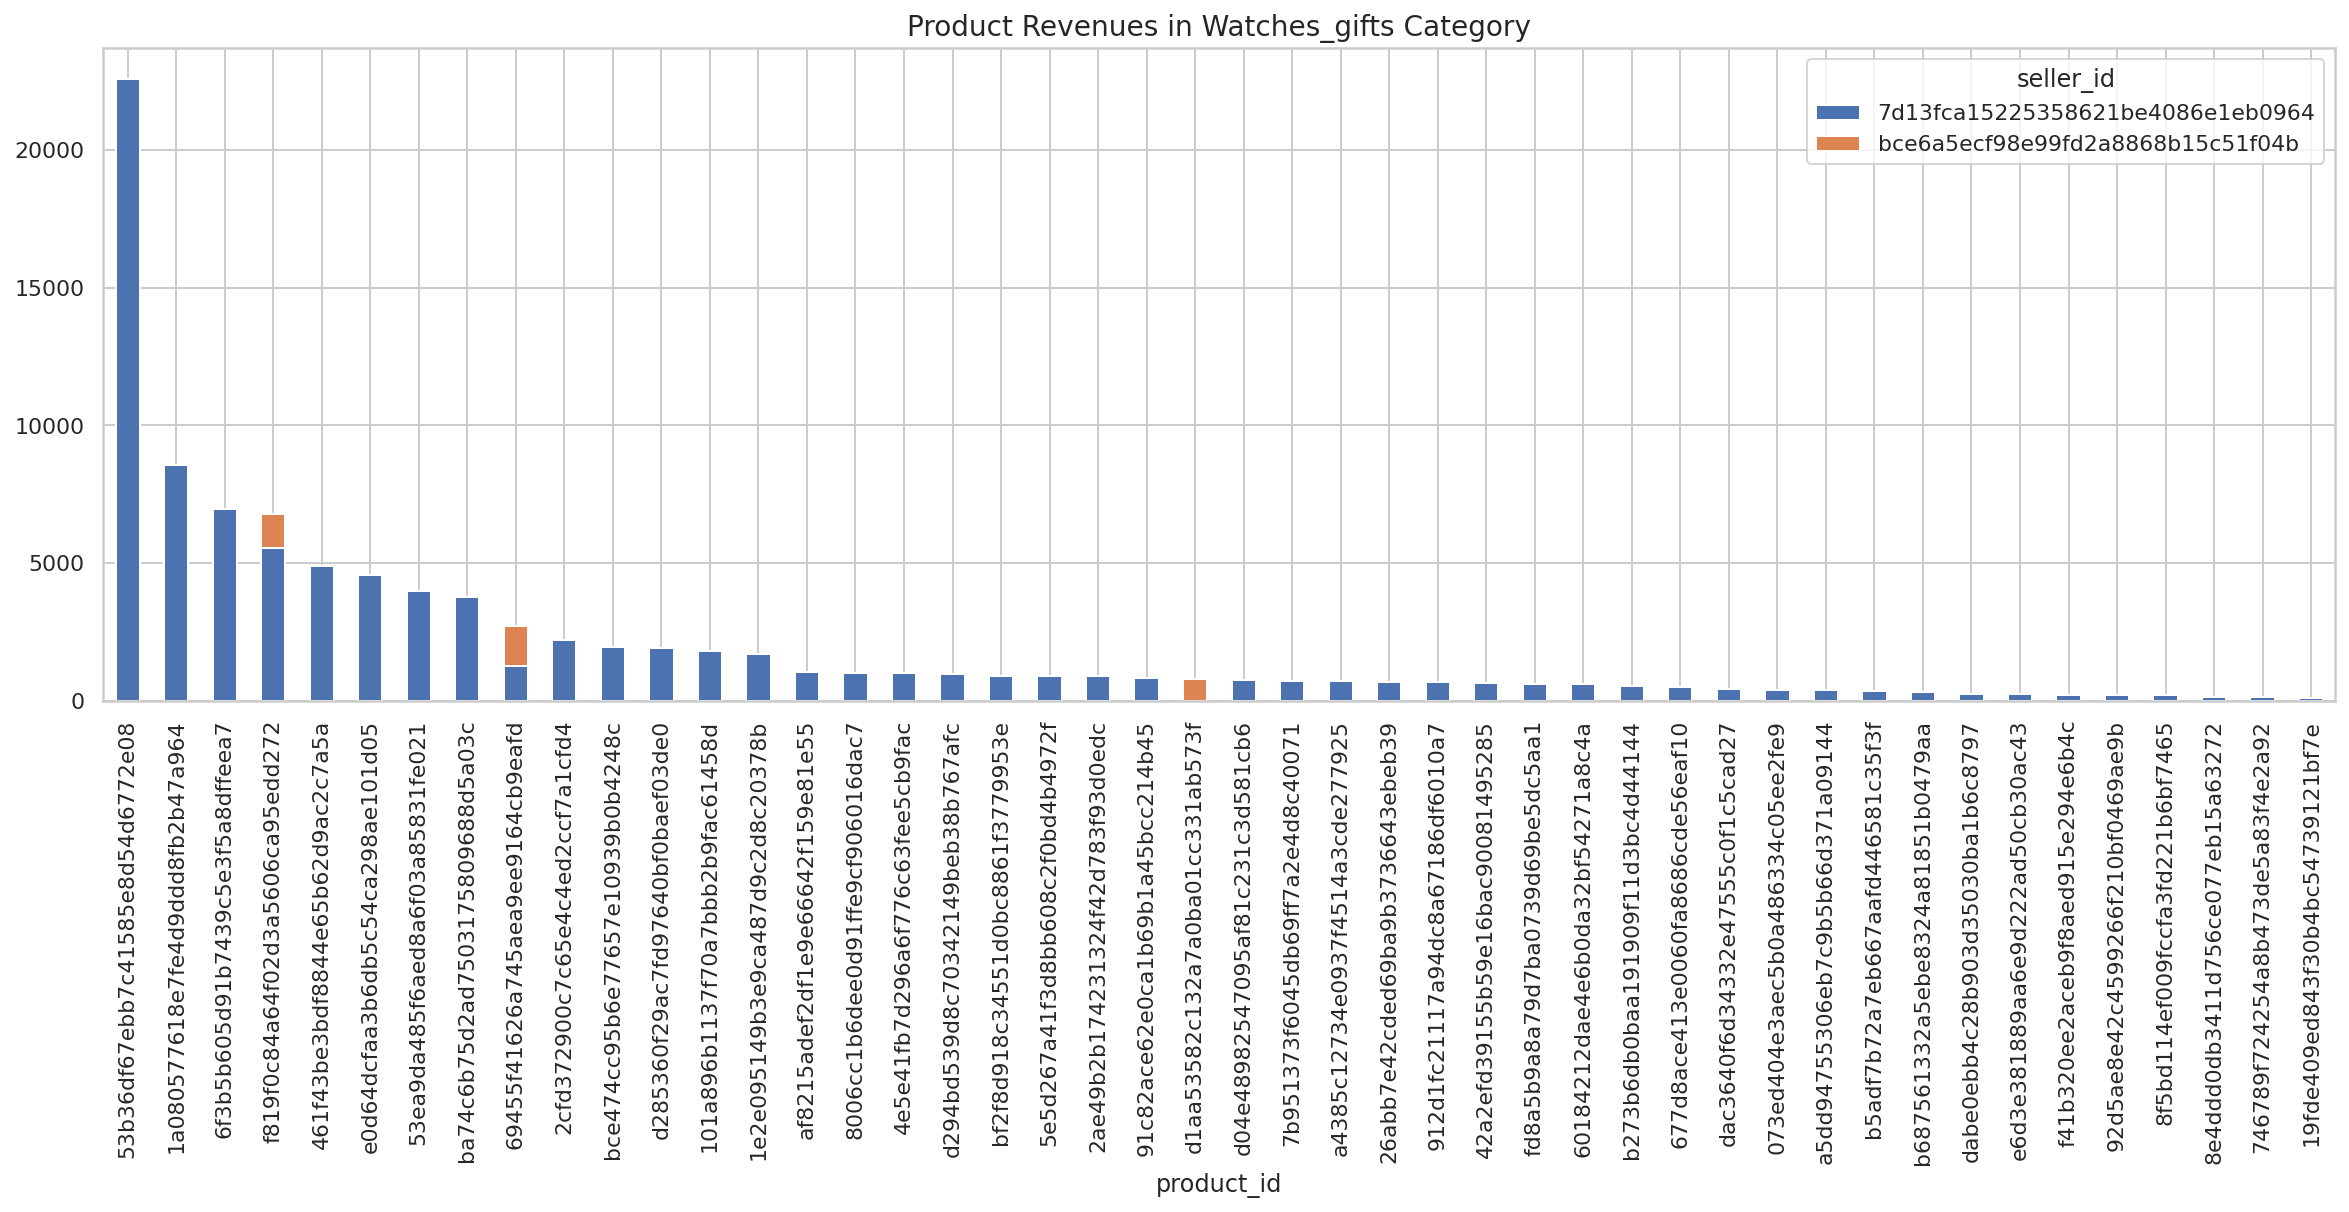

In [62]:
product_seller_revenue.plot.bar(stacked=True, figsize=(20, 6))
plt.title('Product Revenues in Watches_gifts Category', fontsize=14);

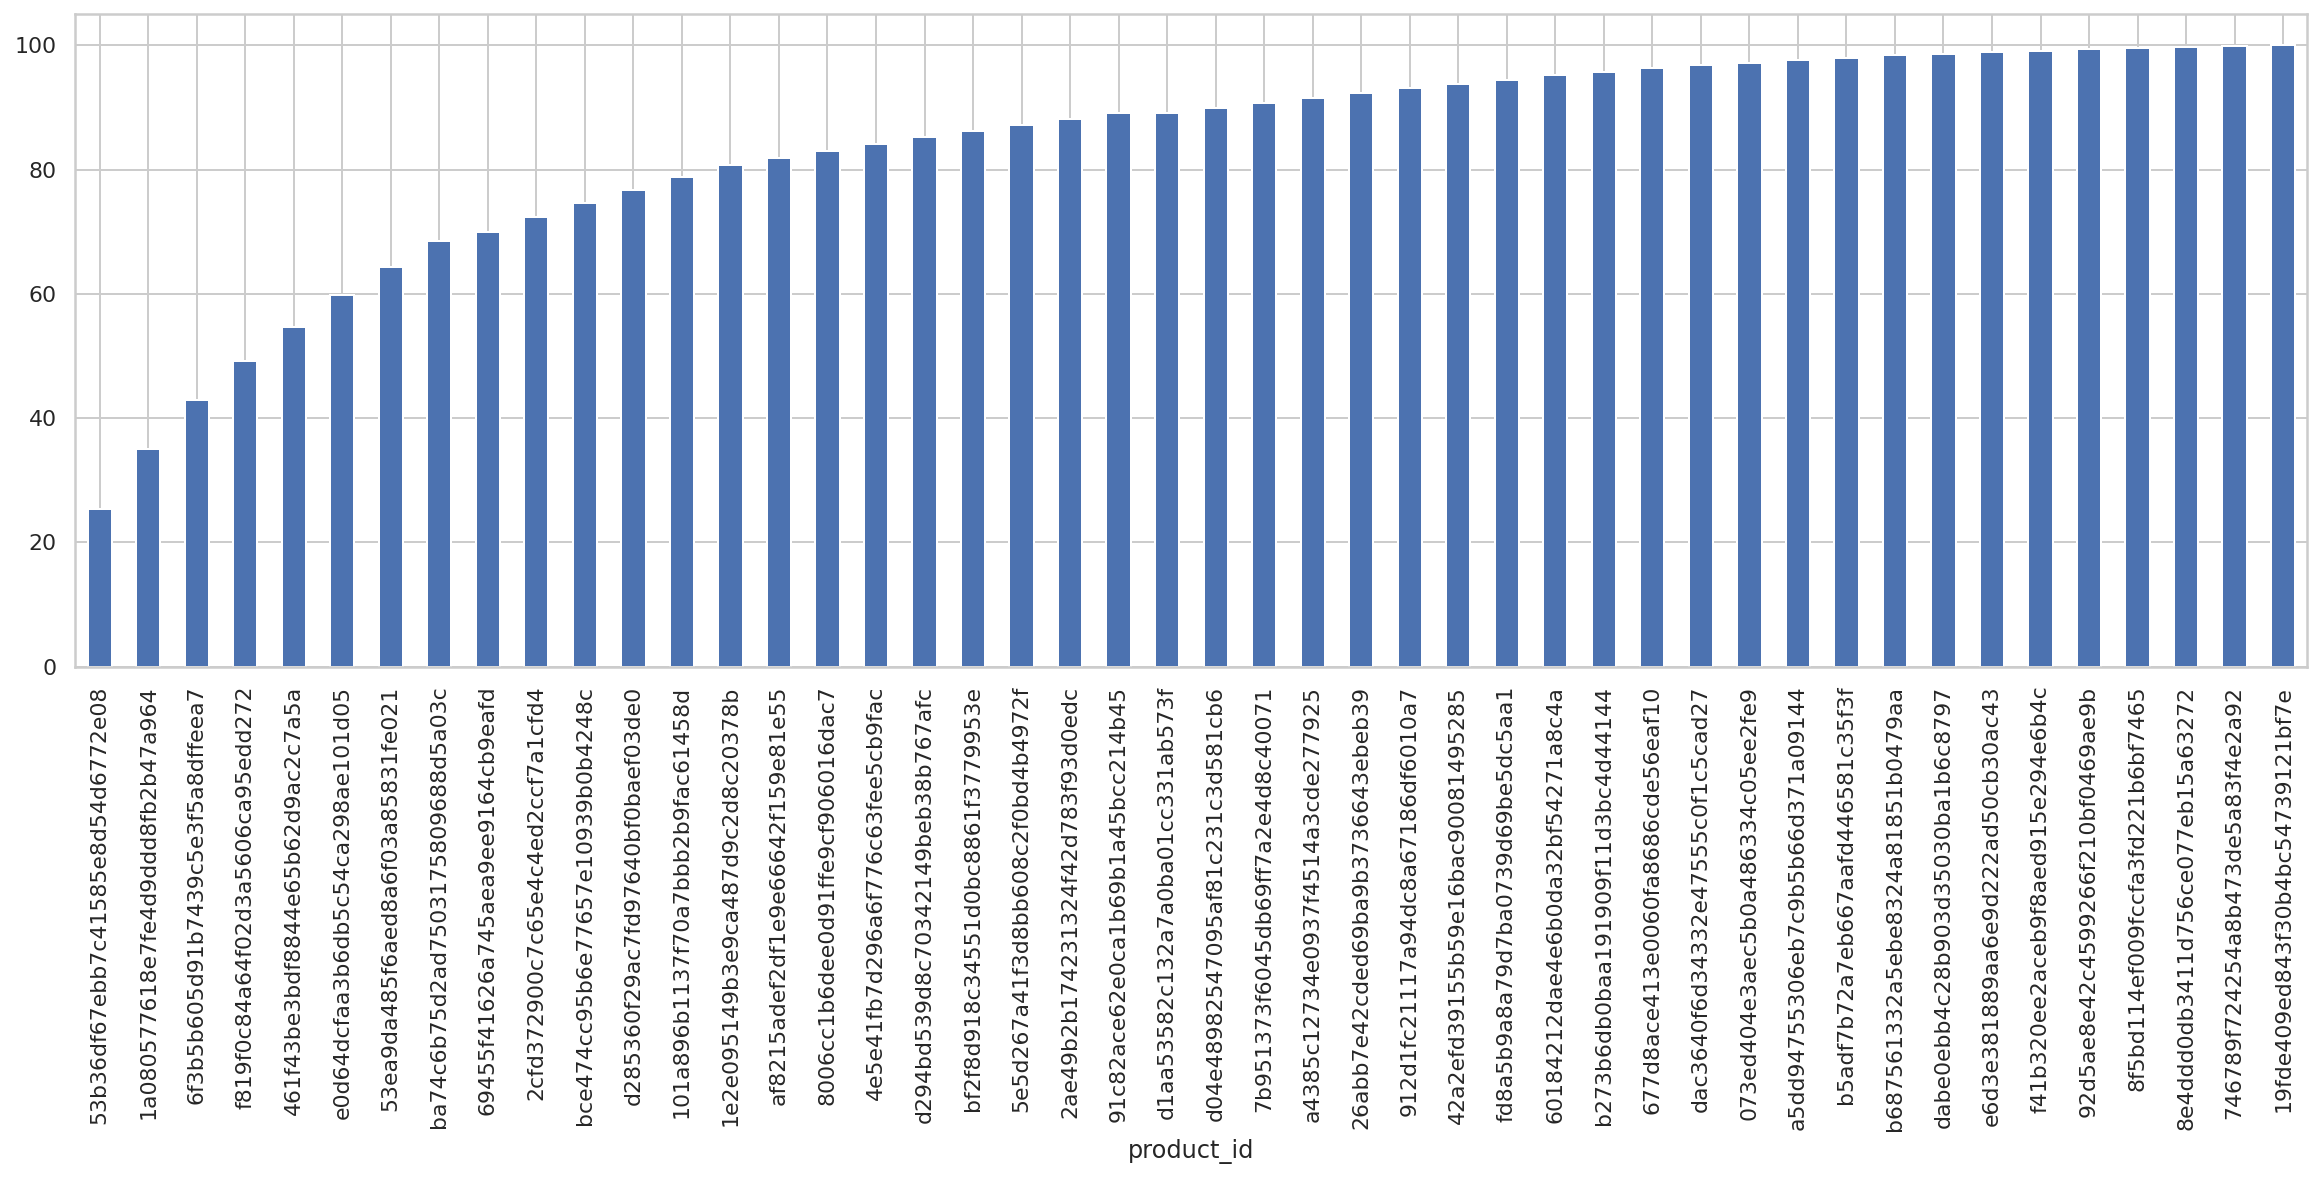

In [63]:
a = product_seller_revenue.copy()
total = a['7d13fca15225358621be4086e1eb0964'].sum()
a['Percentage'] = round(a['7d13fca15225358621be4086e1eb0964'] / total * 100, 2)

t = 0
def sum_percentage(data):
    global t
    t = t + data
    return t

a['sum_percentage'] = a['Percentage'].apply(sum_percentage)

a['sum_percentage'].plot.bar(figsize=(20, 6))

# 4. PAYMENTS

Customers can pay with more than one payment method and therefore we have duplicate order ids in this frame. The sequential feature is used to indicate the payment method order.

In [64]:
payments.describe(include="all")

order_id  payment_sequential payment_type  \
count                             103886       103886.000000       103886   
unique                             99440                 NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                 NaN  credit_card   
freq                                  29                 NaN        76795   
mean                                 NaN            1.092679          NaN   
std                                  NaN            0.706584          NaN   
min                                  NaN            1.000000          NaN   
25%                                  NaN            1.000000          NaN   
50%                                  NaN            1.000000          NaN   
75%                                  NaN            1.000000          NaN   
max                                  NaN           29.000000          NaN   

        payment_installments  payment_value  
count          103886.000000  103886.000000  
unique                   NaN            NaN  
top                      NaN            NaN  
freq                     NaN            NaN  
mean                2.853349     154.100380  
std                 2.687051     217.494064  
min                 0.000000       0.000000  
25%                 1.000000      56.790000  
50%                 1.000000     100.000000  
75%                 4.000000     171.837500  
max                24.000000   13664.080000

## 4.1 Payment Distribution

In [65]:
def plot_dist(values, log_values, title, color="#D84E30"):
    fig, axis = plt.subplots(1, 2, figsize=(12,4))
    axis[0].set_title("{} - linear scale".format(title))
    axis[1].set_title("{} - logn scale".format(title))
    ax1 = sns.distplot(values, color=color, ax=axis[0])
    ax2 = sns.distplot(log_values, color=color, ax=axis[1])

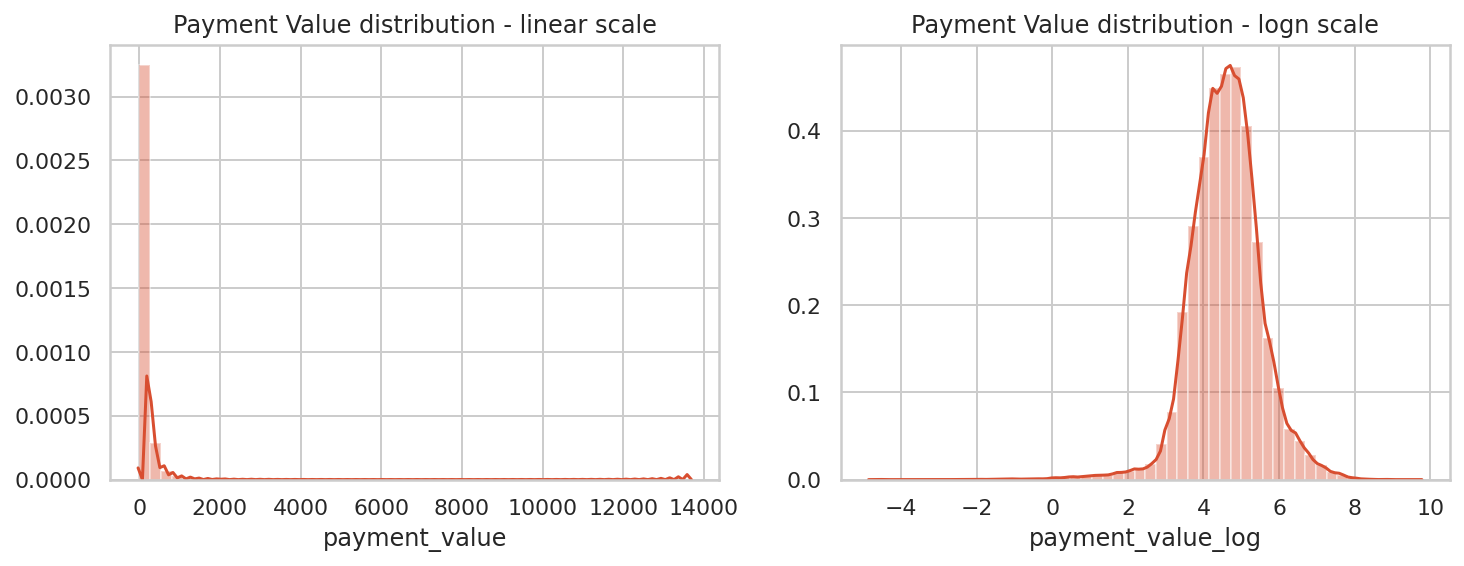

In [66]:
payments['payment_value_log'] = payments['payment_value'].apply(lambda x: np.log(x) if x > 0 else 0)

plot_dist(payments['payment_value'], payments['payment_value_log'], 'Payment Value distribution')

## 4.2 Payment Method

Most payments are done with credit card (almost 75%) and another 20% with boleto.

In [67]:
method_count = payments['payment_type'].value_counts().to_frame().reset_index()
method_value = payments.groupby('payment_type')['payment_value'].sum().to_frame().reset_index()

# Plotly piechart
colors = None
trace1 = go.Pie(labels=method_count['index'], values=method_count['payment_type'],
                domain= {'x': [0, .48]}, marker=dict(colors=colors))
trace2 = go.Pie(labels=method_value['payment_type'], values=method_value['payment_value'],
                domain= {'x': [0.52, 1]}, marker=dict(colors=colors))

layout = dict(title= "Number of payments (left) and Total payments value (right)", 
              height=400, width=800)
fig = dict(data=[trace1, trace2], layout=layout)
iplot(fig)

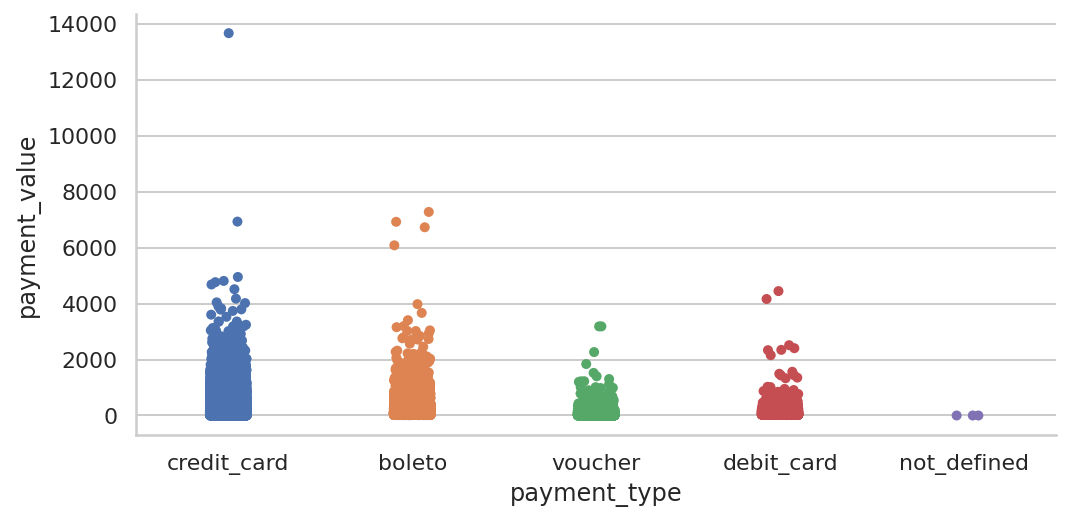

In [68]:
sns.catplot(x="payment_type", y="payment_value",data=payments, aspect=2, height=3.8)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



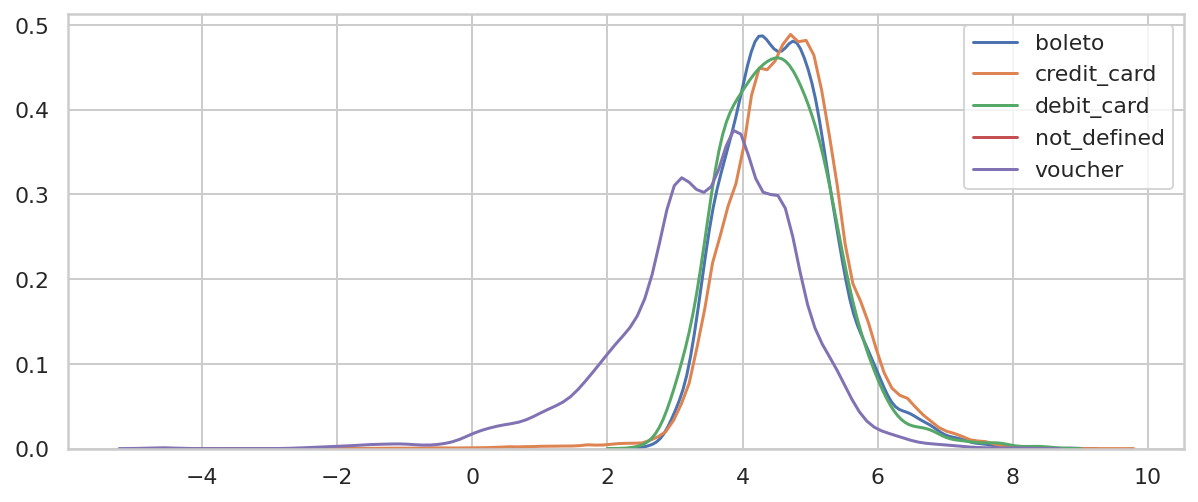

In [69]:
gr = payments.groupby('payment_type')['payment_value_log']
plt.figure(figsize=(10,4))
for label, arr in gr:
    sns.kdeplot(arr, label=label)

## 4.3 Installment

Only credit cards can have more than one installment:

In [70]:
payments[payments['payment_installments'] == 1]['payment_type'].value_counts().to_frame()

payment_type
credit_card         25455
boleto              19784
voucher              5775
debit_card           1529
not_defined             3

In [71]:
payments[payments['payment_installments'] > 1]['payment_type'].value_counts().to_frame()

payment_type
credit_card         51338

In [72]:
payments.groupby('payment_installments')['payment_value'].mean()

payment_installments
0      94.315000
1     112.420229
2     127.228150
3     142.539317
4     163.976840
5     183.465222
6     209.849952
7     187.673672
8     307.737427
9     203.440870
10    415.085837
11    124.932174
12    321.678496
13    150.462500
14    167.962667
15    445.553108
16    292.694000
17    174.602500
18    486.483333
20    615.801765
21    243.700000
22    228.710000
23    236.480000
24    610.048889
Name: payment_value, dtype: float64

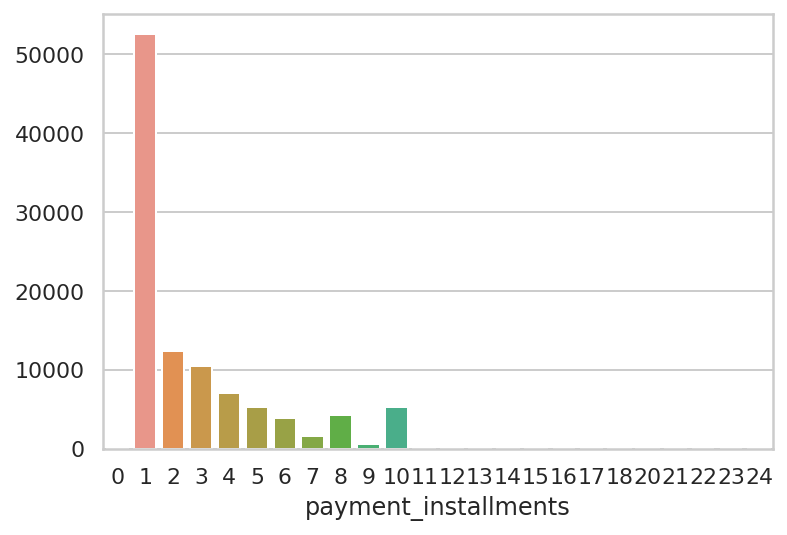

In [73]:
ins_count = payments.groupby('payment_installments').size()
sns.barplot(x=ins_count.index, y=ins_count)

In [74]:
pay_one_inst = payments[payments['payment_installments'] == 1]
method_count = pay_one_inst['payment_type'].value_counts().to_frame().reset_index()
method_value = pay_one_inst.groupby('payment_type')['payment_value'].sum().to_frame().reset_index()
# Plotly piechart
colors = None
trace1 = go.Pie(labels=method_count['index'], values=method_count['payment_type'],
                domain= {'x': [0, .48]}, marker=dict(colors=colors))
trace2 = go.Pie(labels=method_value['payment_type'], values=method_value['payment_value'],
                domain= {'x': [0.52, 1]}, marker=dict(colors=colors))
layout = dict(title= "Orders and value for a single installment", 
              height=400, width=800,)
fig = dict(data=[trace1, trace2], layout=layout)
iplot(fig)

# 5 Order - Order Items - Products

### 5.1 The Number of Products in each order 
- 1 order mostly includes 1 or 2 products

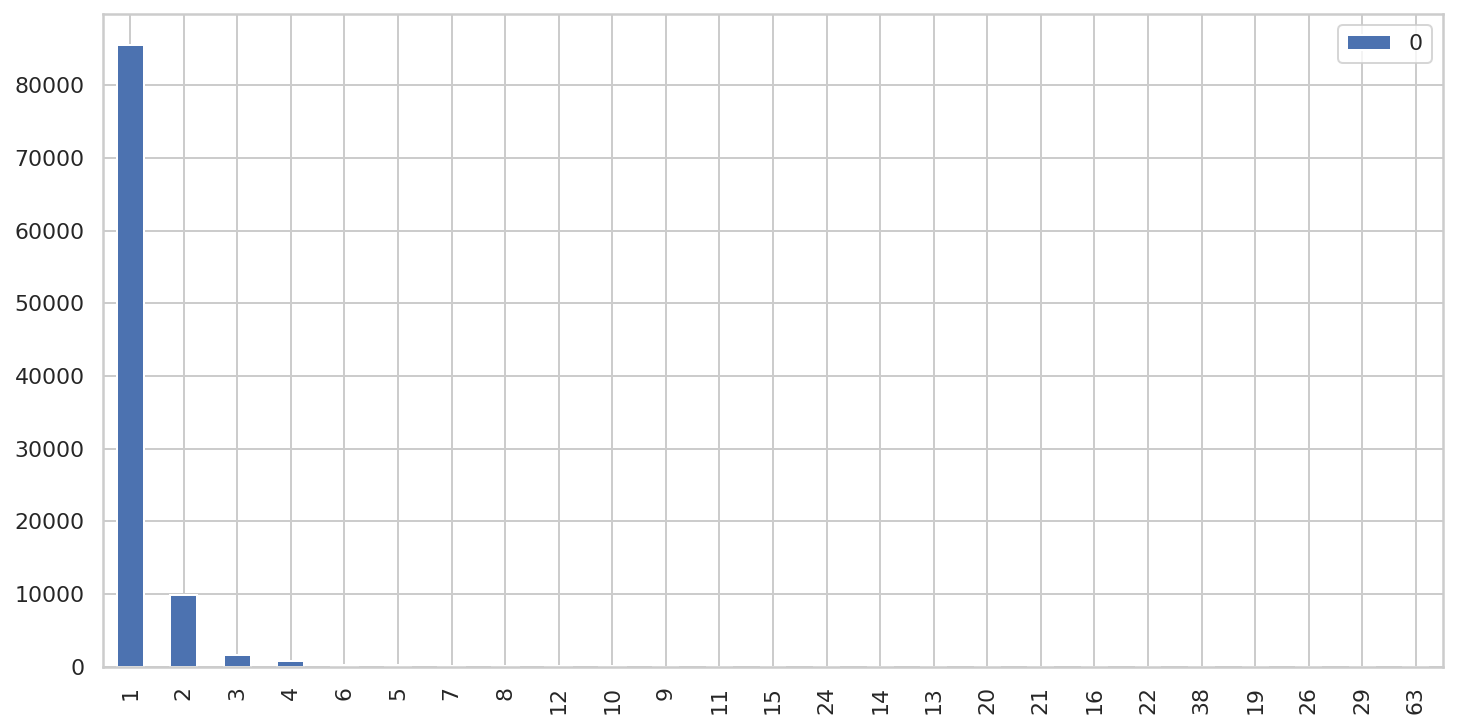

In [75]:
data.groupby('order_id').size().value_counts().to_frame().plot.bar(figsize=(12, 6))

## 5.2 Product Price - Freigh Value
- Product unit price is mostly less than \$1000.
- Freight value revolves around \$150. 

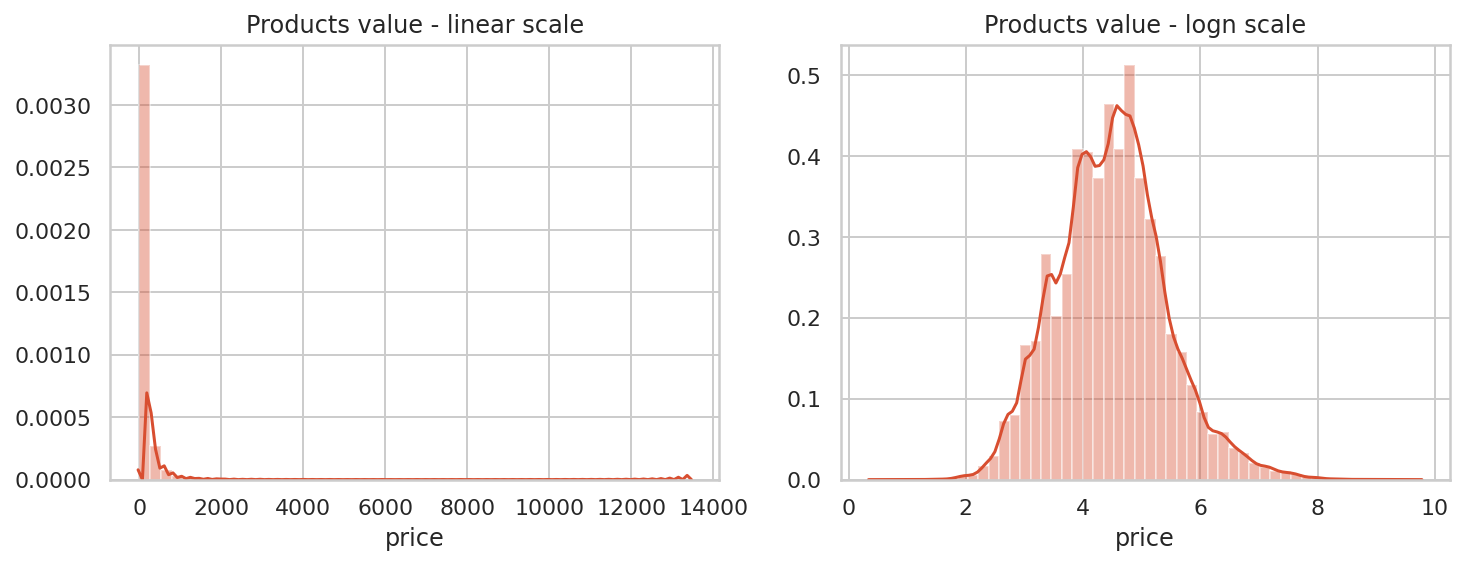

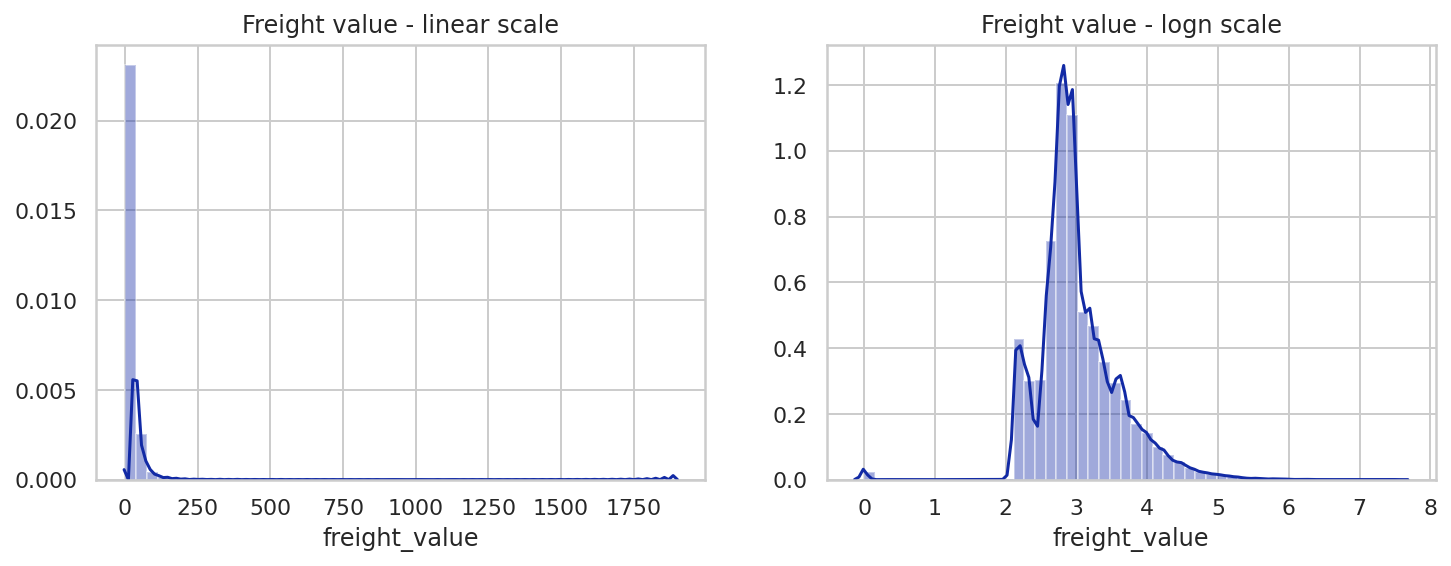

In [76]:
# Products value
sum_value = data.groupby('order_id')['price'].sum()
plot_dist(sum_value, np.log1p(sum_value), 'Products value')

# Freights value
sum_value = data.groupby('order_id')['freight_value'].sum()
plot_dist(sum_value, np.log1p(sum_value), 'Freight value', color="#122aa5")

## 5.3 Purchase timestamp

In [77]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

There is a huge spike in Nov 24 due to Black Friday

Sales are weak after Dec 20 (end-year holidays)

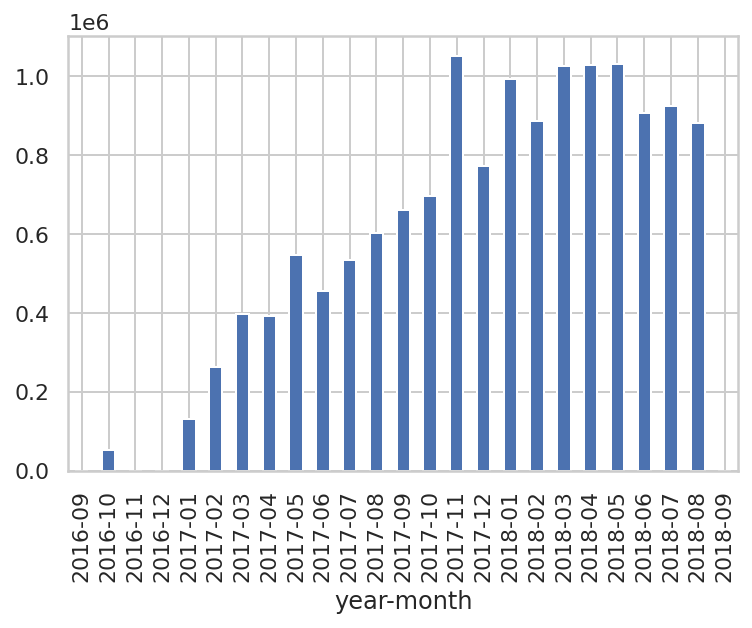

In [78]:
value_month = data[['order_purchase_timestamp', 'price']].copy()
value_month['year-month'] = value_month['order_purchase_timestamp'].dt.to_period('M')
value_month.set_index('year-month', inplace=True)
value_month.groupby(pd.Grouper(freq="M"))['price'].sum().plot.bar()

## 5.4 Quantity - Revenue by products
- The 2 chart below pretty much speak for themselves

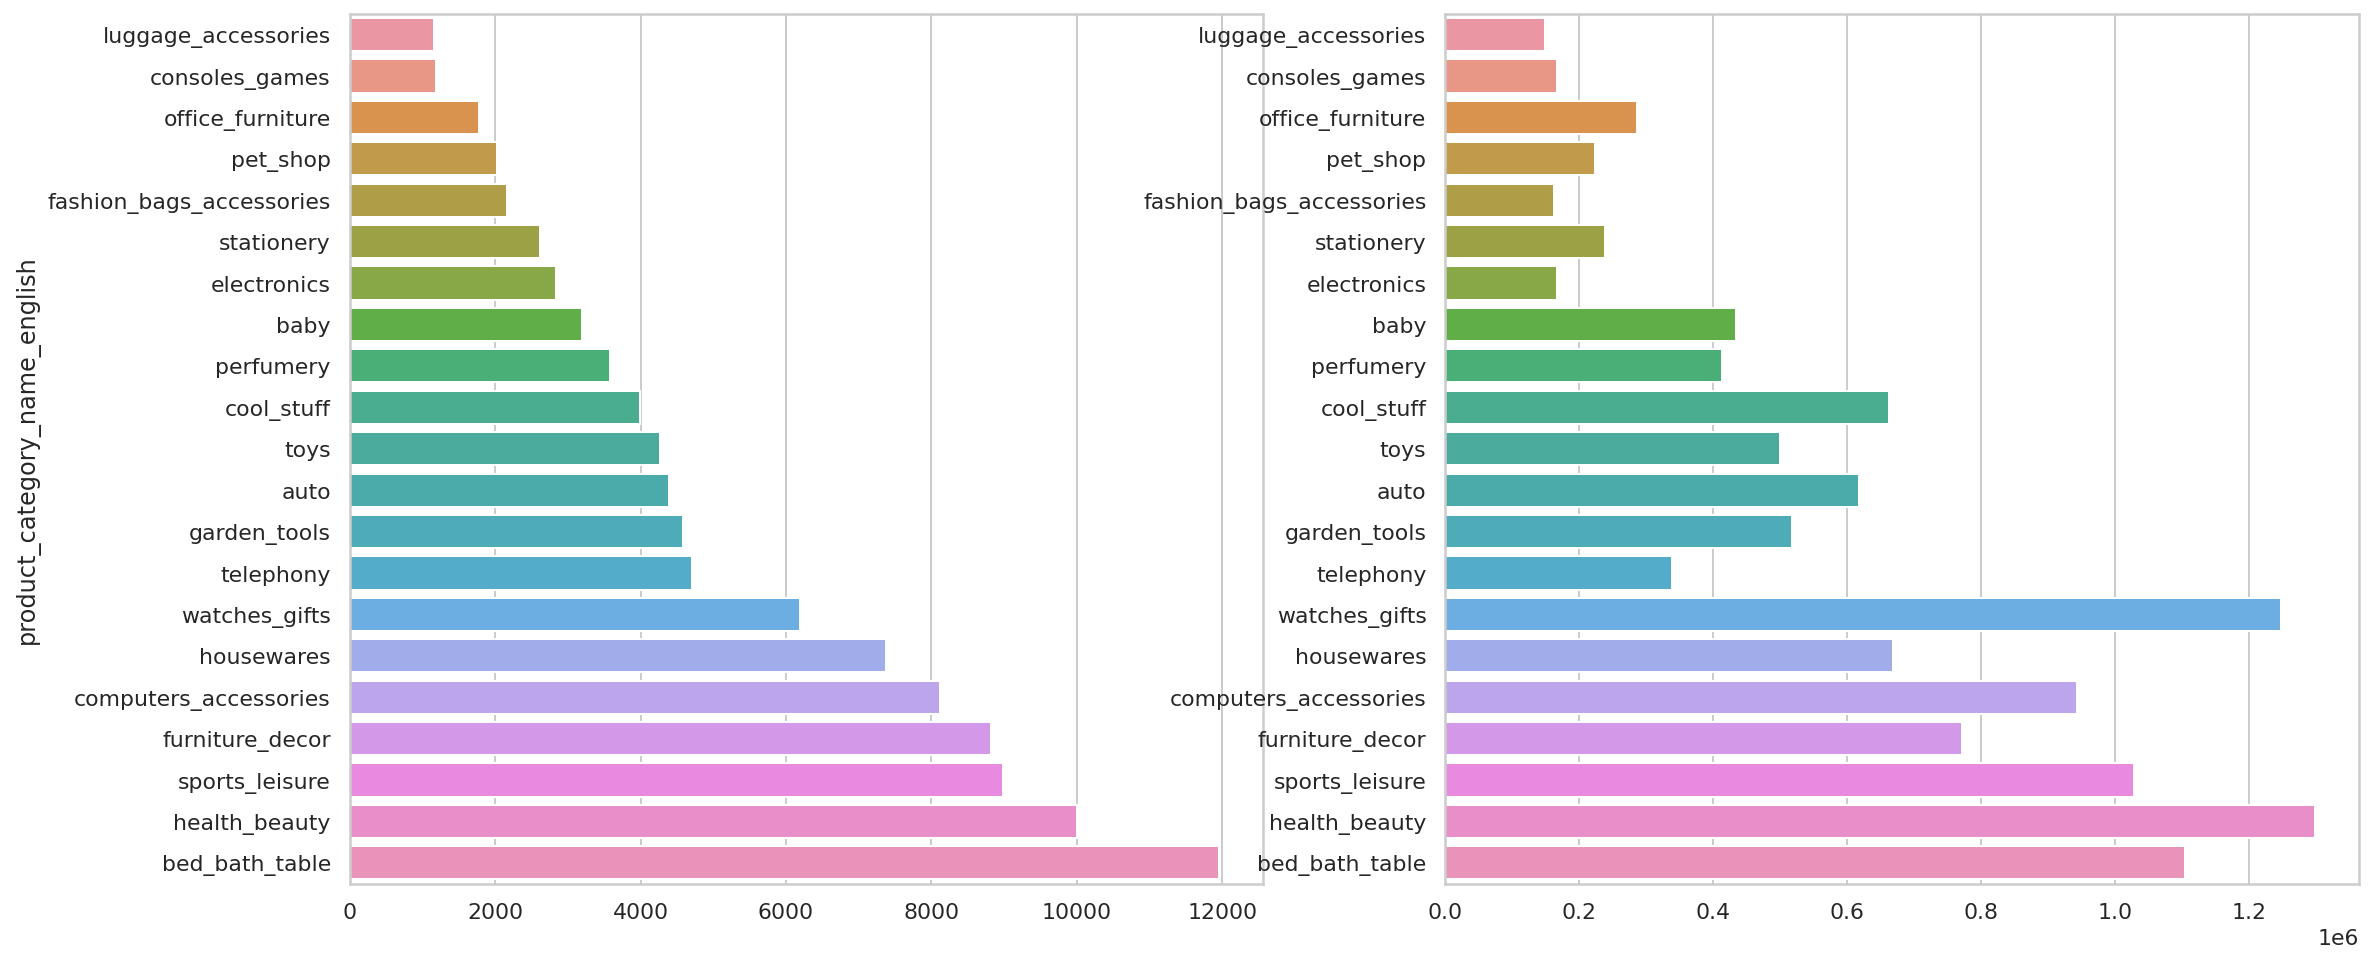

In [79]:
orders_count = data.groupby('product_category_name_english').size()
orders_count['others'] = orders_count[orders_count < 1000].sum()
orders_count = orders_count[orders_count >= 1000].sort_values(ascending=True)

orders_value = data.groupby('product_category_name_english')['price'].sum()
orders_value = orders_value[orders_count.index]

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()
sns.barplot(x=orders_count.values[:-1], y=orders_count.index[:-1], ax=axes[0])
plt.ylabel('');
sns.barplot(x=orders_value.values[:-1], y=orders_value.index[:-1], ax=axes[1])
plt.ylabel('');

## 5.5 Review Score

#### Observation
- The review score of 5 is leading the chart

- The second chart show that the product's price doesn't impact on how customers' score

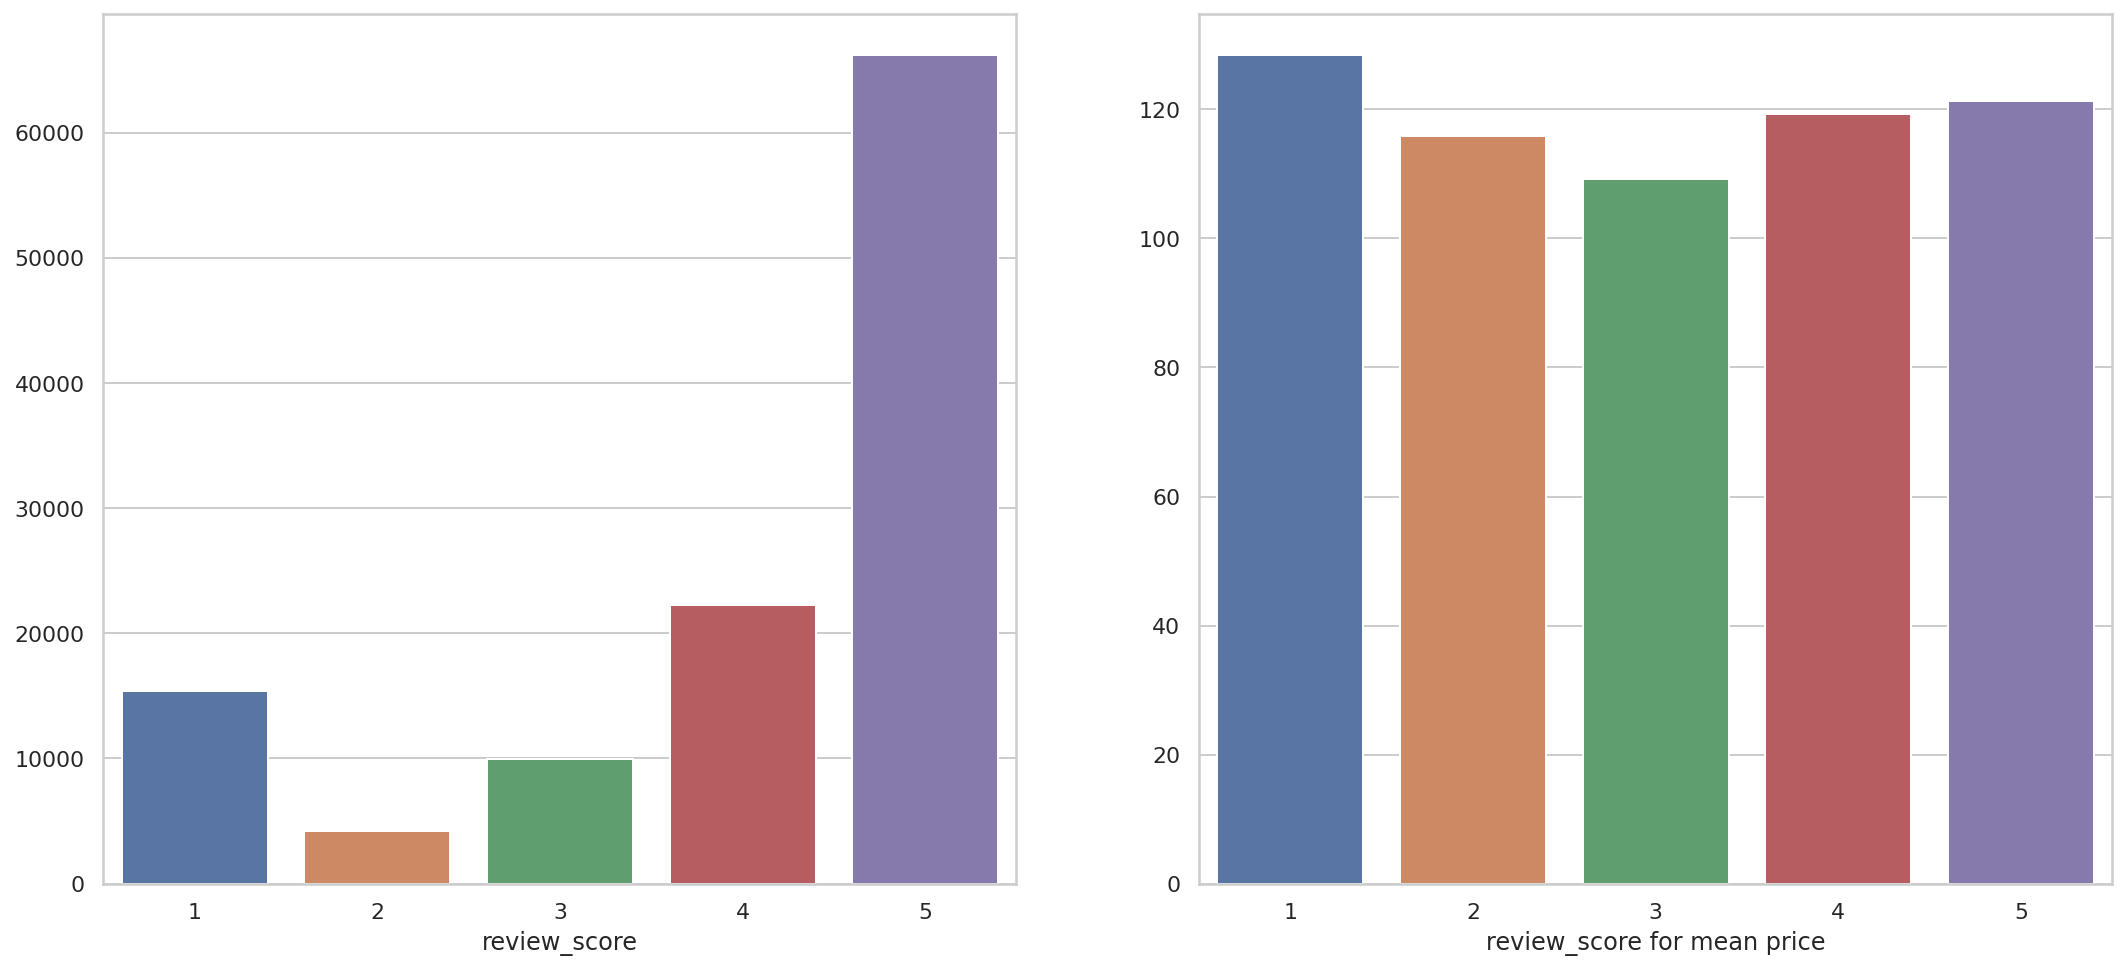

In [80]:
review_qty = data.groupby('review_score').size()
review_value = data.groupby('review_score')['price'].mean()

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()
sns.barplot(x=review_qty.index, y=review_qty.values, ax=axes[0])
plt.xlabel('');
sns.barplot(x=review_value.index, y=review_value.values, ax=axes[1])
plt.xlabel('review_score for mean price');

## 5.6 Delivery Time

In [81]:
# Convert columns to datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date'])
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])

data['delivery_time'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days
data['estimated_delivery_time'] = (data['order_estimated_delivery_date'] - data['order_purchase_timestamp']).dt.days

#### Observation
- Actual delivery time is usually earlier than estimated delivery time, resulting good customers' experience.

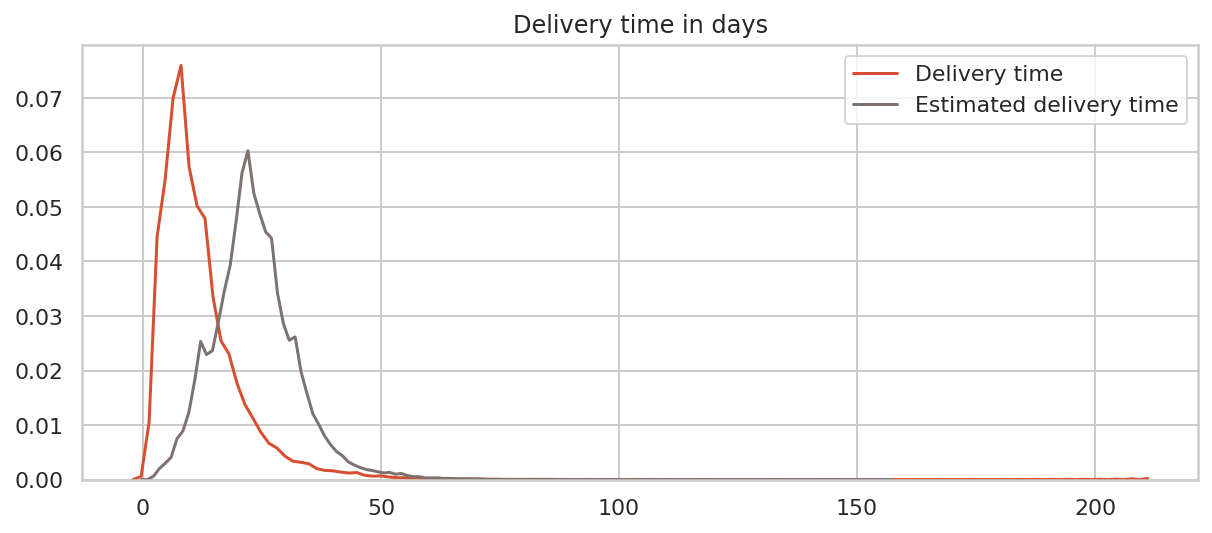

In [82]:
plt.figure(figsize=(10,4))
plt.title("Delivery time in days")
ax1 = sns.kdeplot(data['delivery_time'].dropna(), color="#D84E30", label='Delivery time')
ax2 = sns.kdeplot(data['estimated_delivery_time'].dropna(), color="#7E7270", label='Estimated delivery time')

#### Observation
- Most delivery time is less than 50 days.
- Review score is lower for longer delivery time.
- Customer really giving better review score as they get their order in advanced!

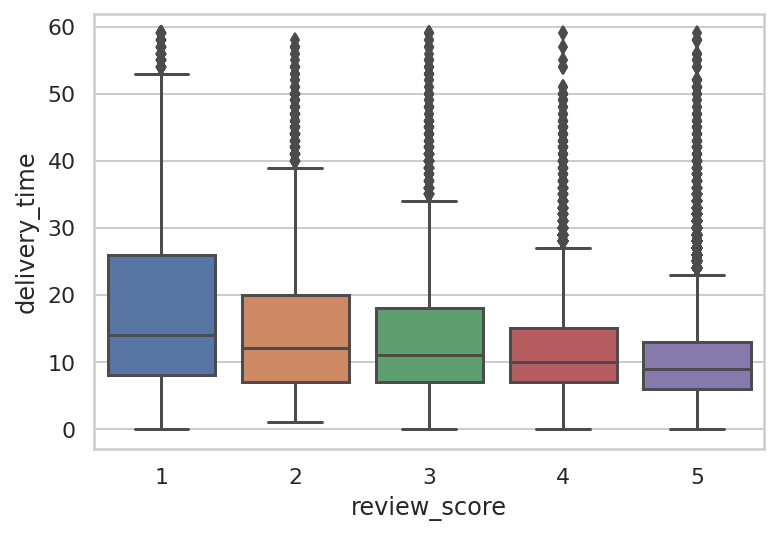

In [83]:
sns.boxplot(x="review_score", y="delivery_time",
            data=data[data['delivery_time'] < 60])

# 6 GEOLOCATION

## 6.1 States

In [84]:
geo_state = data.groupby('geolocation_state')['geolocation_lat','geolocation_lng'].mean().reset_index()
geo_city = data.groupby('geolocation_city')['geolocation_lat','geolocation_lng'].mean().reset_index()

In [85]:
geo = [go.Scattermapbox(lon = geo_state['geolocation_lng'],
                        lat = geo_state['geolocation_lat'],
                        text = geo_state['geolocation_state'],
                        marker = dict(size = 18,
                                      color = 'tomato',))]

layout = dict(title = 'Brazil State',
              mapbox = dict(accesstoken = 'pk.eyJ1IjoiaG9vbmtlbmc5MyIsImEiOiJjam43cGhpNng2ZmpxM3JxY3Z4ODl2NWo3In0.SGRvJlToMtgRxw9ZWzPFrA',
                            center= dict(lat=-22,lon=-43),
                            bearing=10,
                            pitch=0,
                            zoom=2,))

fig = dict(data=geo, layout=layout)
iplot(fig, validate=False)

In [86]:
customer_by_location = data.copy()

geo_city.columns = ['geolocation_city', 'geolocation_city_lat', 'geolocation_city_lng']
geo_state.columns = ['geolocation_state', 'geolocation_state_lat', 'geolocation_state_lng']

customer_by_location = pd.merge(customer_by_location, geo_city,
                how='inner', on='geolocation_city')
customer_by_location = pd.merge(customer_by_location, geo_state,
                how='inner', on='geolocation_state')

city_spend = customer_by_location.groupby(['customer_city','geolocation_city_lng','geolocation_city_lat'])['price'].sum().to_frame().reset_index()
city_freight = customer_by_location.groupby(['customer_city','geolocation_city_lng','geolocation_city_lat'])['freight_value'].mean().reset_index()
state_spend = customer_by_location.groupby(['customer_state','geolocation_state_lng','geolocation_state_lat'])['price'].sum().to_frame().reset_index()
state_freight = customer_by_location.groupby(['customer_state','geolocation_state_lng','geolocation_state_lat'])['freight_value'].mean().reset_index()
state_freight['text'] = 'state: ' + state_freight['customer_state'] + ' | freight: ' + round(state_freight['freight_value'],1).astype(str)

### 6.1.1 Orders by State

In [87]:
state_order = [go.Scattergeo(lon = state_spend['geolocation_state_lng'],
                      lat = state_spend['geolocation_state_lat'],
                      text = state_freight['text'],
                      marker = dict(size = state_spend['price']/2000,
                                    sizemin = 5,
                                    color= state_freight['freight_value'],
                                    colorscale= 'balance',
                                    cmin = 20,
                                    cmax = 50,
                                    line = dict(width=0.1, color='rgb(40,40,40)'),
                                    sizemode = 'area'
                                   ),
                      name = 'State'),]
layout = dict(
        title = 'Brazilian E-commerce Order by States',
        showlegend = True,
        autosize=True,
        width = 900,
        height = 600,
        geo = dict(
            scope = "south america",
            projection = dict(type='winkel tripel', scale = 1),
            center = dict(lon=-47,lat=-22),
            showland = True,
            showcountries= True,
            showsubunits=True,
            landcolor = 'rgb(155, 155, 155)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = dict( data=state_order, layout=layout )
iplot( fig, validate=False)

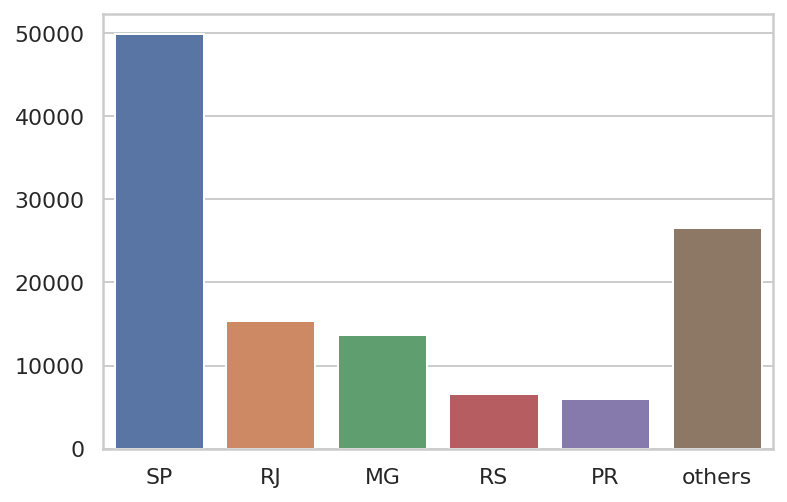

In [88]:
count_state = data['geolocation_state'].value_counts()
count_state['others'] = count_state[count_state < 5000].sum()
count_state = count_state[count_state > 5000]

sns.barplot(x=count_state.index, y=count_state.values)

### 6.1.2 Freigh Value by State

In [89]:
freigh_value = [go.Scattergeo(lon = state_freight['geolocation_state_lng'],
                      lat = state_freight['geolocation_state_lat'],
                      text = state_freight['text'],
                      marker = dict(size = (state_freight['freight_value']-10)**2,
                                    sizemin = 5,
                                    color= state_freight['freight_value'],
                                    colorscale= 'balance',
                                    cmin = 20,
                                    cmax = 50,
                                    line = dict(width=0.1, color='rgb(40,40,40)'),
                                    sizemode = 'area'
                                   ),
                      name = 'State'),]
layout = dict(
        title = 'Freight Values',
        showlegend = True,
        autosize=True,
        width = 900,
        height = 600,
        geo = dict(
            scope = "south america",
            projection = dict(type='winkel tripel', scale = 1.0),
            center = dict(lon=-47,lat=-22),
            showland = True,
            showcountries= True,
            showsubunits=True,
            landcolor = 'rgb(155, 155, 155)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = dict( data=freigh_value, layout=layout)
iplot( fig, validate=False)

In [90]:
state_delivery_time = data.groupby('customer_state')['delivery_time'].mean().to_frame()

state_delivery_time.columns = ['avg_state_delivery_time']
state_delivery_time = state_delivery_time.reset_index()

state_delivery_time = pd.merge(state_delivery_time,state_spend,
                how='inner', on='customer_state')

# Clean delivery time
state_delivery_time = state_delivery_time[state_delivery_time['avg_state_delivery_time'] > 0]

# Show text on the graph
state_delivery_time['text'] = 'state: ' + state_delivery_time['customer_state'].astype('str') + ' ' + \
                            (state_delivery_time['avg_state_delivery_time'].apply(np.ceil)).astype('str') + ' days'

### 6.1.3 State Delivery Days

In [91]:
State_Delivery_Days = [go.Scattergeo(lon = state_delivery_time['geolocation_state_lng'],
                      lat = state_delivery_time['geolocation_state_lat'],
                      text = state_delivery_time['text'],
                      marker = dict(size = 20,
                                    sizemin = 5,
                                    color= ((state_delivery_time['avg_state_delivery_time'])**2),
                                    colorscale= 'agsunset',
                                    cmin = 10,
                                    cmax = 255,
                                    line = dict(width=0.1, color='rgb(40,40,40)'),
                                    sizemode = 'area'
                                   ),
                      name = 'State'),]
layout = dict(
        title = 'State Delivery Days',
        showlegend = True,
        autosize=True,
        width = 900,
        height = 600,
        geo = dict(
            scope = "south america",
            projection = dict(type='winkel tripel', scale = 1.6),
            center = dict(lon=-47,lat=-22),
            showland = True,
            showcountries= True,
            showsubunits=True,
            landcolor = 'rgb(155, 155, 155)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = dict( data=State_Delivery_Days, layout=layout)
iplot( fig, validate=False)

## 6.2 Cities

In [92]:
geo = [go.Scattermapbox(lon = geo_city['geolocation_city_lng'],
                        lat = geo_city['geolocation_city_lat'],
                        text = geo_city['geolocation_city'],
                        marker = dict(size = 3,
                                      color = 'tomato',))]

layout = dict(title = 'Brazil City',
              mapbox = dict(accesstoken = 'pk.eyJ1IjoiaG9vbmtlbmc5MyIsImEiOiJjam43cGhpNng2ZmpxM3JxY3Z4ODl2NWo3In0.SGRvJlToMtgRxw9ZWzPFrA',
                            center= dict(lat=-22,lon=-43),
                            bearing=10,
                            pitch=0,
                            zoom=2,))

fig = dict(data=geo, layout=layout)
iplot(fig, validate=False)

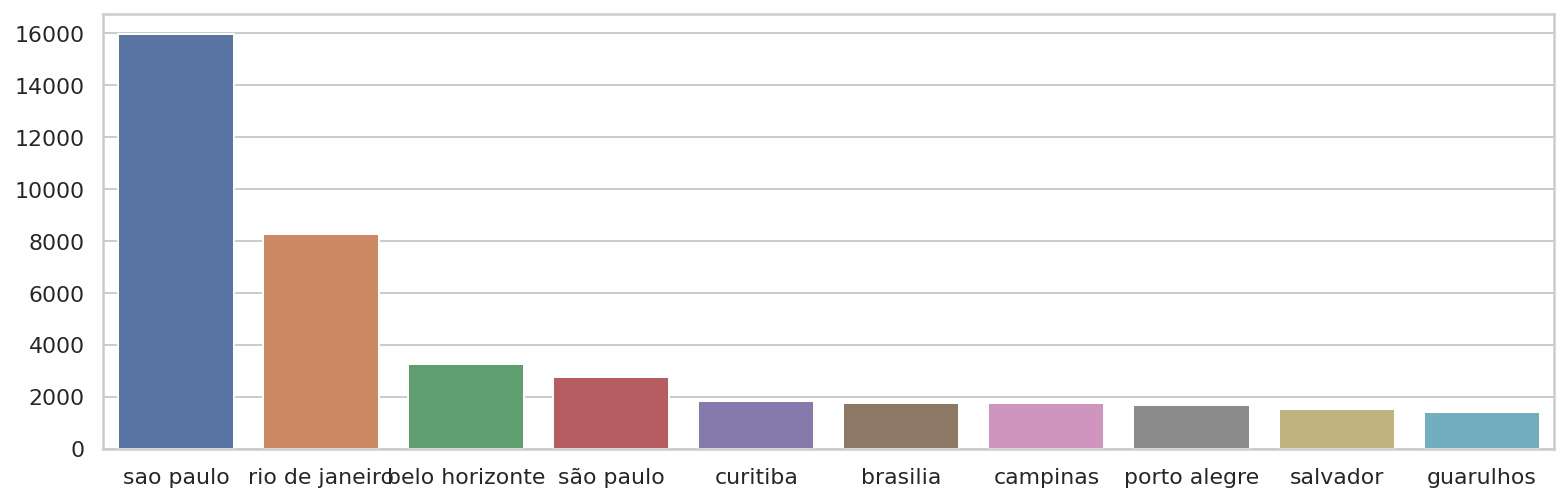

In [93]:
count_city = data['geolocation_city'].value_counts()

plt.figure(figsize=(13,4))
sns.barplot(x=count_city.index[:10], y=count_city.values[:10])

### 6.2.1 City Delivery Days

In [94]:
city_delivery_time = data.groupby('customer_city')['delivery_time'].mean().to_frame()

city_delivery_time.columns = ['avg_city_delivery_time']
city_delivery_time = city_delivery_time.reset_index()

city_delivery_time = pd.merge(city_delivery_time,city_spend,
                how='inner', on='customer_city')

# Clean delivery time
city_delivery_time = city_delivery_time[city_delivery_time['avg_city_delivery_time'] > 0]

# Show text on the graph
city_delivery_time['text'] = 'city: ' + city_delivery_time['customer_city'].astype('str') + ' ' + city_delivery_time['avg_city_delivery_time'].astype('str') + ' days'

#### Observation
- Top 5 cities experience the worst delivey time are: Brazilia, Jaguariuna, Mogi-guacu, Camacari, Uba

In [95]:
City_Delivery_Days = [go.Scattergeo(lon = city_delivery_time['geolocation_city_lng'],
                      lat = city_delivery_time['geolocation_city_lat'],
                      text = city_delivery_time['text'],
                      marker = dict(size = 3,
                                    sizemin = 5,
                                    color= ((city_delivery_time['avg_city_delivery_time'])**2),
                                    colorscale= 'agsunset',
                                    cmin = 10,
                                    cmax = 255,
                                    line = dict(width=0.1, color='rgb(40,40,40)'),
                                    sizemode = 'area'
                                   ),
                      name = 'City'),]
layout = dict(
        title = 'City Delivery Days',
        showlegend = True,
        autosize=True,
        width = 900,
        height = 600,
        geo = dict(
            scope = "south america",
            projection = dict(type='winkel tripel', scale = 1.6),
            center = dict(lon=-47,lat=-22),
            showland = True,
            showcountries= True,
            showsubunits=True,
            landcolor = 'rgb(155, 155, 155)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

fig = dict( data=City_Delivery_Days, layout=layout)
iplot( fig, validate=False)

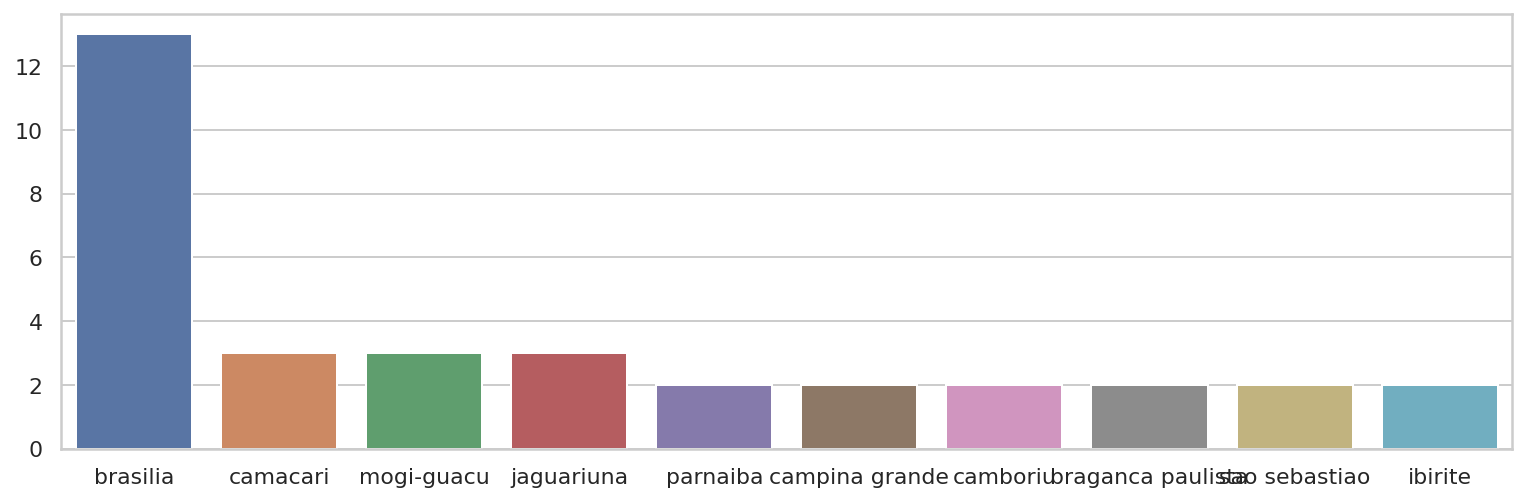

In [96]:
delivery_time_city = city_delivery_time['customer_city'].value_counts()

plt.figure(figsize=(13,4))
sns.barplot(x=delivery_time_city.index[:10], y=delivery_time_city.values[:10])

# 7 CUSTOMERS

In [97]:
print(customers['customer_id'].duplicated().sum())
print(customers['customer_unique_id'].duplicated().sum())

0
3345


# TOP 10 PRODUCTS
# TOP 10 SELLERS
# ORDER TREND: YEAR, MONTH, WEEKDAY, HOUR
# TRANSACTION VALUE BY CITY, STATE